## Create the final figures and latex table for the paper

# User

In [1]:
Method =  'Template_M'   # template method
# Method =  'GP_M'       # Gaussian-Process method

# Peculiar velocity uncertainty to use in the plots. 
# This is just to -select- 
# the appropiate folder containing
# the Hubble diagram that was previously computed using 
# this value of vpecFix. 
vpecFix = 150 # km/s. Options (150, 200, 300, 400)

MainDir = '/Users/arturo/Dropbox/Research/Articulos/10_AndyKaisey/\
10Compute/TheTemplates/'

DirSaveOutput = '/Users/arturo/Dropbox/Research/Articulos/10_AndyKaisey/\
10Latex/Plots_LatexTables_ForThePaper/'

NotebookName = '14_Latex_Tables_Figures.ipynb'

###################################################################

#--- Fixed values ---
c = 299792.458  # Speed of light (km/s)
cc = 299792.458  # Speed of light (km/s)
HoFix = 73.24 # Hubble constant (km/(s Mpc))

OmMFix = 0.28 # Omega_Matter
OmLFix = 0.72 # Omega_Lambda
wFix = -1 # Dark energy EoS

#--- Uncertainty in z_CMB:---

# Dan Scolnic gave me the value of err_cz_CMB = 150 km/s about the collection 
# of z_CMB values he provided me.
err_cz_CMB = 150 # km/s. 

# err_zCMB_fix =  0.0005003461427972281 when err_cz_CMB = 150 km/s
err_zCMB_fix = err_cz_CMB/cc


------

# AUTOMATIC

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad as intquad

# Anderson-Darling & Kolmogorov-Smirnov tests
import scipy.stats as stats

5+4

9

### Read Individual YJHK bands

In [3]:
# import os
# import glob # To read the name of the files in a given directory

###################################################################
# Directory and datatable file of distance modulus for a given band.

#-------------

#    Y band

# Hubble diagram 
if Method == 'Template_M':
    Y_HubbleDir = MainDir+'Y_band/Std_filters/4_HubbleDiagram_FlatPrior/AllSamples/\
Templ_AllSamples_z_gr_0/\
Phase-8_30_resid20_chi3_EBVh0.4_Method7_MinData3_vpec%s_ok/plots_HD/'%vpecFix
    Y_HubbleDataFile = 'DistanceMu_Good_AfterCutoffs_Main_.txt'
    Y_RMS = 'Summary_HDScatter_RMS_.txt'

elif Method == 'GP_M':
    Y_HubbleDir = MainDir+'Y_band/Std_filters/4_HubbleDiagram_FlatPrior_GP/AllSamples/\
vpec%s_NIRmax/plots_HD/'%vpecFix
    Y_HubbleDataFile = 'DistanceMu_Good_AfterCutoffs_Main_.txt'
    Y_RMS = 'Summary_HDScatter_RMS_.txt'

# Template
Y_TempDir = MainDir+'Y_band/Std_filters/3_Template_FlatPrior/AllSamples_vpec_0/z_gr_0/'
Y_TempErrorFile  = 'Template_phase_mu_stdError_FromR_Norma.dat'
Y_TempStdDevFile = 'Template_phase_mu_tau_FromR_Norma.dat'

#-------------

#    J band

# Hubble diagram 
if Method == 'Template_M':
    J_HubbleDir = MainDir+'J_band/Std_filters/4_HubbleDiagram_FlatPrior/AllSamples/\
Templ_AllSamples_z_gr_0/\
Phase-8_30_resid20_chi_1e6_EBVh0.4_Method7_MinData3_vpec%s_ok/plots_HD/'%vpecFix
    J_HubbleDataFile = 'DistanceMu_Good_AfterCutoffs_Main_.txt'
    J_RMS = 'Summary_HDScatter_RMS_.txt'
    
elif Method == 'GP_M':
    J_HubbleDir = MainDir+'J_band/Std_filters/4_HubbleDiagram_FlatPrior_GP/AllSamples/\
vpec%s_NIRmax/plots_HD/'%vpecFix
    J_HubbleDataFile = 'DistanceMu_Good_AfterCutoffs_Main_.txt'
    J_RMS = 'Summary_HDScatter_RMS_.txt'

# Template
J_TempDir = MainDir+'J_band/Std_filters/3_Template_FlatPrior/AllSamples_vpec_0/z_gr_0/'
J_TempErrorFile  = 'Template_phase_mu_stdError_FromR_Norma.dat'
J_TempStdDevFile = 'Template_phase_mu_tau_FromR_Norma.dat'

#-------------

#    H band

# Hubble diagram 
if Method == 'Template_M':
    H_HubbleDir = MainDir+'H_band/Std_filters/4_HubbleDiagram_FlatPrior/AllSamples/\
Templ_AllSamples_z_gr_0/\
Phase-8_30_resid20_chi_1e6_EBVh0.4_Method7_MinData3_vpec%s_ok/plots_HD/'%vpecFix
    H_HubbleDataFile = 'DistanceMu_Good_AfterCutoffs_Main_.txt'
    H_RMS = 'Summary_HDScatter_RMS_.txt'
    
elif Method == 'GP_M':
    H_HubbleDir = MainDir+'H_band/Std_filters/4_HubbleDiagram_FlatPrior_GP/AllSamples/\
vpec%s_NIRmax/plots_HD/'%vpecFix
    H_HubbleDataFile = 'DistanceMu_Good_AfterCutoffs_Main_.txt'
    H_RMS = 'Summary_HDScatter_RMS_.txt'

# Template
H_TempDir = MainDir+'H_band/Std_filters/3_Template_FlatPrior/AllSamples_vpec_0/z_gr_0/'
H_TempErrorFile  = 'Template_phase_mu_stdError_FromR_Norma.dat'
H_TempStdDevFile = 'Template_phase_mu_tau_FromR_Norma.dat'

#-------------

#    K band

# Hubble diagram 
if Method == 'Template_M':
    K_HubbleDir = MainDir+'K_band/Std_filters/4_HubbleDiagram_FlatPrior/AllSamples/\
Templ_AllSamples_z_gr_0/\
Phase-8_30_resid20_chi4_EBVh0.4_Method7_MinData3_vpec%s_ok/plots_HD/'%vpecFix
    K_HubbleDataFile = 'DistanceMu_Good_AfterCutoffs_Main_.txt'
    K_RMS = 'Summary_HDScatter_RMS_.txt'
    
elif Method == 'GP_M':
    K_HubbleDir = MainDir+'K_band/Std_filters/4_HubbleDiagram_FlatPrior_GP/AllSamples/\
vpec%s_NIRmax/plots_HD/'%vpecFix
    K_HubbleDataFile = 'DistanceMu_Good_AfterCutoffs_Main_.txt'
    K_RMS = 'Summary_HDScatter_RMS_.txt'

# Template
K_TempDir = MainDir+'K_band/Std_filters/3_Template_FlatPrior/AllSamples_vpec_0/z_gr_0/'
K_TempErrorFile  = 'Template_phase_mu_stdError_FromR_Norma.dat'
K_TempStdDevFile = 'Template_phase_mu_tau_FromR_Norma.dat'

###################################################################


In [4]:
# Reading the 'DistanceMu_Good_AfterCutoffs_Main_.txt' and 
# 'Summary_HDScatter_RMS_.txt' datatable files for each band

Y_HubbleData = np.genfromtxt(Y_HubbleDir+Y_HubbleDataFile, 
                 dtype=['S30',
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float])
Y_RMSData = np.genfromtxt(Y_HubbleDir+Y_RMS)

J_HubbleData = np.genfromtxt(J_HubbleDir+J_HubbleDataFile, 
                 dtype=['S30',
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float])
J_RMSData = np.genfromtxt(J_HubbleDir+J_RMS)

H_HubbleData = np.genfromtxt(H_HubbleDir+H_HubbleDataFile, 
                 dtype=['S30',
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float])
H_RMSData = np.genfromtxt(H_HubbleDir+H_RMS)

K_HubbleData = np.genfromtxt(K_HubbleDir+K_HubbleDataFile, 
                 dtype=['S30',
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float,float,float,float,float,float,float,float,
                       float,float,float])
K_RMSData = np.genfromtxt(K_HubbleDir+K_RMS)

print '#        %s method:'%Method
print "# len(Y_HubbleData) = %s SNe, len(Y_RMSData) = %s"%(
    len(Y_HubbleData), len(Y_RMSData))
print "# len(J_HubbleData) = %s SNe, len(J_RMSData) = %s"%(
    len(J_HubbleData), len(J_RMSData))
print "# len(H_HubbleData) = %s SNe, len(H_RMSData) = %s"%(
    len(H_HubbleData), len(H_RMSData))
print "# len(K_HubbleData) = %s SNe, len(K_RMSData) = %s"%(
    len(K_HubbleData), len(K_RMSData))

#        Template_M method:
# len(Y_HubbleData) = 37 SNe, len(Y_RMSData) = 9
# len(J_HubbleData) = 87 SNe, len(J_RMSData) = 13
# len(H_HubbleData) = 80 SNe, len(H_RMSData) = 13
# len(K_HubbleData) = 30 SNe, len(K_RMSData) = 13


In [5]:
#        GP_M method:
# len(Y_HubbleData) = 29 SNe, len(Y_RMSData) = 9
# len(J_HubbleData) = 51 SNe, len(J_RMSData) = 13
# len(H_HubbleData) = 45 SNe, len(H_RMSData) = 13
# len(K_HubbleData) = 13 SNe, len(K_RMSData) = 13
#--------------
#        GP_M method:
# len(Y_HubbleData) = 30 SNe, len(Y_RMSData) = 9
# len(J_HubbleData) = 56 SNe, len(J_RMSData) = 13
# len(H_HubbleData) = 48 SNe, len(H_RMSData) = 13
# len(K_HubbleData) = 15 SNe, len(K_RMSData) = 13

In [6]:
#        Template_M method:
# len(Y_HubbleData) = 39 SNe, len(Y_RMSData) = 10
# len(J_HubbleData) = 85 SNe, len(J_RMSData) = 13
# len(H_HubbleData) = 79 SNe, len(H_RMSData) = 13
# len(K_HubbleData) = 34 SNe, len(K_RMSData) = 13
#--------------
# OLD
#        Template_M method:
# len(Y_HubbleData) = 29 SNe, len(Y_RMSData) = 11
# len(J_HubbleData) = 92 SNe, len(J_RMSData) = 13
# len(H_HubbleData) = 84 SNe, len(H_RMSData) = 13
# len(K_HubbleData) = 43 SNe, len(K_RMSData) = 13

### Read Combined NIR bands

In [7]:
# Total distance modulus from combined several NIR bands

if Method ==  'Template_M':
    DirTotalMu = MainDir+'AllBands/Plots/HubbleDiagram/Template/'  
elif Method ==  'GP_M':
    DirTotalMu = MainDir+'AllBands/Plots/HubbleDiagram/GaussianProcess/'
    
try:
    AllBands_HubbleData = np.genfromtxt(DirTotalMu+'Table_TotalMu_AllBands_Notes_.txt', 
                         dtype=['S30',
                               float,float,float,float,float,float,float,float,float,float,
                               float,float,float,float,float,float,float,float,float,float,
                               float,float,float,float,float,float,float,float,float,float,
                               float,float,float])
except:
    AllBands_HubbleData = np.genfromtxt(DirTotalMu+'Table_TotalMu_AllBands_.txt', 
                     dtype=['S30',
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float])
AllBands_RMSData = np.genfromtxt(DirTotalMu+'AllBands/Summary_HDScatter_RMS_.txt')

#-------------------------------------

YJH_HubbleData = np.genfromtxt(DirTotalMu+'Table_TotalMu_YJH_.txt', 
                     dtype=['S30',
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float])
YJH_RMSData = np.genfromtxt(DirTotalMu+'YJH/Summary_HDScatter_RMS_.txt')

#-------------------------------------

JHK_HubbleData = np.genfromtxt(DirTotalMu+'Table_TotalMu_JHK_.txt', 
                     dtype=['S30',
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float,float,float,float,float,float,float,float,
                           float,float,float])
JHK_RMSData = np.genfromtxt(DirTotalMu+'JHK/Summary_HDScatter_RMS_.txt')

#-------------------------------------

print '#        %s method:'%Method
print "# len(AnyYJHK_HubbleData) = %s SN, len(AllBands_RMSData) = %s"%(
    len(AllBands_HubbleData), len(AllBands_RMSData))
print "# len(YJH_HubbleData) = %s SN, len(YJH_RMSData) = %s"%(
    len(YJH_HubbleData), len(YJH_RMSData))
print "# len(JHK_HubbleData) = %s SN, len(JHK_RMSData) = %s"%(
    len(JHK_HubbleData), len(JHK_RMSData))

#        Template_M method:
# len(AnyYJHK_HubbleData) = 89 SN, len(AllBands_RMSData) = 13
# len(YJH_HubbleData) = 33 SN, len(YJH_RMSData) = 9
# len(JHK_HubbleData) = 28 SN, len(JHK_RMSData) = 13


In [8]:
#        GP_M method:
# len(AnyYJHK_HubbleData) = 56 SN, len(AllBands_RMSData) = 13
# len(YJH_HubbleData) = 22 SN, len(YJH_RMSData) = 9
# len(JHK_HubbleData) = 10 SN, len(JHK_RMSData) = 11

In [9]:
#      Template_M method:
# len(AnyYJHK_HubbleData) = 92 SN, len(AllBands_RMSData) = 13
# len(YJH_HubbleData) = 27 SN, len(YJH_RMSData) = 11
# len(JHK_HubbleData) = 40 SN, len(JHK_RMSData) = 13

### Read Optical-bands fits

NOTES: If I don't have the optical SALT2 and SNOOPy Hubble diagrams (or one of them)

In [10]:
# Distance modulus from Snoopy and SALT2 fitting.

#------------ Snoopy -------------------------

DirSnoopyMu = MainDir+'AllBands/Plots/HubbleDiagram/Snoopy_opt/plots_HD/'

try: 
    Snoopy_HubbleData = np.genfromtxt(DirSnoopyMu+'DistanceMu_Good_AfterCutoffs_Main_Notes_.txt', 
                                 dtype=['S30',
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float])
except: 
    Snoopy_HubbleData = np.genfromtxt(DirSnoopyMu+'DistanceMu_Good_AfterCutoffs_Main_.txt', 
                                 dtype=['S30',
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float])
    
Snoopy_RMSData = np.genfromtxt(DirSnoopyMu+"Summary_HDScatter_RMS_.txt")
Ho_snoopy = 72    # 72 km/s is Snoopy default value

#------------ SALT2 -------------------------

DirSalt2Mu = MainDir+'AllBands/Plots/HubbleDiagram/SALT2/plots_HD/'

try:
    SALT2_HubbleData = np.genfromtxt(DirSalt2Mu+'DistanceMu_Good_AfterCutoffs_Main_Notes_.txt', 
                                 dtype=['S30',
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float])
except:
    SALT2_HubbleData = np.genfromtxt(DirSalt2Mu+'DistanceMu_Good_AfterCutoffs_Main_.txt', 
                                 dtype=['S30',
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float,float,float,float,float,float,float,float,
                                       float,float,float])
    
SALT2_RMSData = np.genfromtxt(DirSalt2Mu+"Summary_HDScatter_RMS_.txt")
Ho_salt2 = 73.24    # 70 km/s is SALT2 default value

#### Some latex lines needed for all the output latex files.

In [11]:
# Some latex lines needed for all the output latex files.
line_0 = '\\renewcommand{\\arraystretch}{0.001} \n'
line_1 = '\\begin{table*} % The asterisk helps to center the table in the page \n'
line_2 = '\\begin{center} \n'
line_3 = '\\caption[]{Caption} \n'
line_4 = '\\scriptsize \n'
line_6 = '\\hline \n'

line_12 = '\\hline \n'
line_13 = '\\end{tabular} \n'
line_14 = '\\vspace{-0.5cm} \n'
line_15 = '\\label{Table_} \n'
line_16 = '\\end{center} \n'
line_17 = '\\end{table*} % The asterisk helps to center the table in the page \n'
line_18 = '\\renewcommand{\\arraystretch}{1} \n'

### z CMB

In [12]:
# MainDirMetadata = '/Users/arturo/Dropbox/Research/SoftwareResearch/Snoopy/AndyLCComp/\
# MyNotesAbout/'

In [13]:
# (z_helio, error_z_helio)
# From WoodVasey & Andy Friedman metadata file.

"""
InfoSN_czHelio = np.genfromtxt(MainDirMetadata+
                    'WoodVasey_Andy/WoodVasey_AndyFriedman_zCMB_2017_08_11_Converted_.txt',
                            usecols=(0,1,2, 16), dtype=['S24', float, float, 'S6'])

# Create a dictionary: 
InfoSN_czHelio_dict ={}

for i in range(len(InfoSN_czHelio)):
    snname_int1 = InfoSN_czHelio[i][0]
    czHelio_int1 = InfoSN_czHelio[i][1]
    err_czHelio_int1 = InfoSN_czHelio[i][2]
    Ref_int = InfoSN_czHelio[i][3]
    
    InfoSN_czHelio_dict[snname_int1] = [ czHelio_int1, err_czHelio_int1, Ref_int  ]
    
InfoSN_czHelio_dict['sn2006D']
# [2556.0, 5.0, 'NED']
"""
0

0

In [14]:
# (z_helio, error_z_helio, z_CMB, error_z_CMB) 
# From WoodVasey & Andy Friedman metadata file for the SPECIAL CASES

"""
InfoSN_czCMB_Special = np.genfromtxt(MainDirMetadata+
'WoodVasey_Andy/WoodVasey_AndyFriedman_zCMB_2017_08_11_SpecialCases_Converted_Ho73_24.txt',
                            usecols=(0,1,2, 14, 15, 16), 
                            dtype=['S10', float, float, float, float, 'S6'])

# Create a dictionary: 
InfoSN_czCMB_Special_dict ={}

for i in range(len(InfoSN_czCMB_Special)):
    snname_int2 = InfoSN_czCMB_Special[i][0]
    czHelio_int2 = InfoSN_czCMB_Special[i][1]
    err_czHelio_int2 = InfoSN_czCMB_Special[i][2]
    czCMB_int2 = InfoSN_czCMB_Special[i][3]
    err_czCMB_int2 = InfoSN_czCMB_Special[i][4]
    Ref_int = InfoSN_czHelio[i][3]
    
    InfoSN_czCMB_Special_dict[snname_int2] = [ czHelio_int2, err_czHelio_int2, 
                                              czCMB_int2, err_czCMB_int2, Ref_int  ]
    
InfoSN_czCMB_Special_dict['sn1999cl']
# [2281.0, 3.0, 957.0, 6.0, 'NED']
"""
0

0

In [15]:
# Using Michael Foley flow-corrected z_CMB + Cepheid distances + special cases
# compiled by Andy Friedman
""" 
InfoSN_czCMB_MFoley = np.genfromtxt(MainDirMetadata+'zCMB_FlowCorrected_MichaelFoley_original.txt',
                            usecols=(0, 5), dtype=['S18', float])

# Create a dictionary: 
InfoSN_dict ={}

for i in range(len(InfoSN_czCMB_MFoley)):
    snname_int3      = InfoSN_czCMB_MFoley[i][0]
    czHelio_int3     = InfoSN_czHelio_dict[snname_int3][0]
    err_czHelio_int3 = InfoSN_czHelio_dict[snname_int3][1]
    Ref_int          = InfoSN_czHelio_dict[snname_int3][2]
    
    #---- Define z_CMB and err_z_CMB ------
    
    if snname_int3 in list(InfoSN_czCMB_Special['f0']): # Special cases
        czCMB_int3     = InfoSN_czCMB_Special_dict[snname_int3][2]
        err_czCMB_int3 = InfoSN_czCMB_Special_dict[snname_int3][3]
    else: # Michael Foley's zcmb values
        czCMB_int3     = InfoSN_czCMB_MFoley[i][1]
        err_czCMB_int3 = 150
    
    InfoSN_dict[snname_int3] = [ czHelio_int3, err_czHelio_int3, 
                                              czCMB_int3, err_czCMB_int3, Ref_int  ]
    
InfoSN_dict['sn1998bu']
# [897.0, 4.0, 0.0021141927350000001, 150, 'K04a']
"""
0

0

In [16]:
#       Metadata: (zhel, zcmb)

DirMetadata = '/Users/arturo/Dropbox/Research/SoftwareResearch/Snoopy/\
AndyLCComp_2018_02/'

# Reading the metadata file
infoSNe_data = np.genfromtxt(DirMetadata+'carrick_Flow_corrections_snnames_v1.txt',
                            dtype=['S16', float, float,'S40',float,float,
                                   float,float,float,float,'S16', int ])

# Create a dictionary:
# {snname: zhelio, e_zhel, zcmb, e_zcmb, zcmbFlow, e_zcmbFlow, code, ref}

InfoSN_dict = {infoSNe_data['f0'][i]: (np.array([
                infoSNe_data['f4'][i]/cc, infoSNe_data['f5'][i]/cc,
                infoSNe_data['f6'][i]/cc, infoSNe_data['f7'][i]/cc,
                infoSNe_data['f8'][i]/cc, infoSNe_data['f9'][i]/cc,
                infoSNe_data['f11'][i] ]), infoSNe_data['f10'][i] )
                for i in range(len(infoSNe_data)) }

InfoSN_dict['sn1998bu']
# (array([  2.96204917e-03,   3.33564095e-06,   2.36830508e-03,
#           8.67266648e-05,   3.13883814e-03,   5.00346143e-04,
#           1.00000000e+00]), '"NED;K04a;F01"')

(array([  2.96204917e-03,   3.33564095e-06,   2.52508020e-03,
          2.33494867e-04,   8.07225110e-04,   5.00346143e-04,
          1.00000000e+00]), '"NED;F01"')

In [17]:
InfoSN_dict['sn1998bu'][0]
# array([  2.96204917e-03,   3.33564095e-06,   2.36830508e-03,
#          8.67266648e-05,   3.13883814e-03,   5.00346143e-04,
#          1.00000000e+00])

array([  2.96204917e-03,   3.33564095e-06,   2.52508020e-03,
         2.33494867e-04,   8.07225110e-04,   5.00346143e-04,
         1.00000000e+00])

In [18]:
InfoSN_dict['sn1998bu'][0][0]
# 0.0029620491653595902

0.0029620491653595902

In [19]:
InfoSN_dict['sn1998bu'][1]
# '"NED;K04a;F01"'

'"NED;F01"'

In [20]:
InfoSN_dict['sn1998bu'][1][1:-1]
# 'NED;K04a;F01'

'NED;F01'

### Cepheid distances

In [21]:
DirSNeWithCepheid = '/Users/arturo/Dropbox/Research/SoftwareResearch/Snoopy/AndyLCComp_2018_02/MyNotes/'

ListSNeCepheid = np.genfromtxt(DirSNeWithCepheid+'SNeWithCepheidDistances.txt', 
                               dtype=['S10',float,float,float,float,float,float])

# ListSNeCepheid = np.genfromtxt(DirSNeWithCepheid+'SNeWithCepheidDistances_hack.txt', 
#                                dtype=['S10', float,float,float,float,float,float]) 

print ListSNeCepheid['f0']

"""
['sn2001el' 'sn2003du' 'sn2005cf' 'sn2007af' 'sn2007sr' 'sn2010ai'
 'sn2011by']
"""
0

['sn1981B' 'sn1998aq' 'sn2001el' 'sn2002fk' 'sn2003du' 'sn2005cf'
 'sn2007af' 'sn2007sr' 'sn2009ig' 'sn2011by' 'sn2011fe' 'sn2012cg'
 'sn2012fr']


0

### Weighted mean and variance functions

\begin{align}
s^2 = \frac{\sum^N_{i=1} w_i (x_i - \mu_w)^2}{V_1 - (V_2/V_1)}, \quad \text{where} \quad V_1 \equiv \sum^N_{i=1} w_i  \;\; \text{and} \;\; V_2 = \sum^N_{i=1} w^2_i
\end{align}

In [22]:
# Weighted meand and variance functions
"""

def WeightedMean():
    return

def WeightedStdDev():
    return
"""
0

0

In [23]:
# OK BUT NOT USED
""" 
# Weighted arithmetic mean function
# https://en.wikipedia.org/wiki/Inverse-variance_weighting
# https://en.wikipedia.org/wiki/Weighted_arithmetic_mean

def weightMean(x1, sigma1, x2, sigma2, x3, sigma3):
    weightMeanInt = ( (x1/sigma1**2)+(x2/sigma2**2)+(x3/sigma3**2) )/ ((1/sigma1**2)+(1/sigma2**2)+(1/sigma3**2))
    return weightMeanInt

def weightError(sigma1, sigma2, sigma3):
    weightErrorInt = np.sqrt( 1 / ((1/sigma1**2)+(1/sigma2**2)+(1/sigma3**2)) )
    return weightErrorInt
"""
0 

0

In [24]:
# Inverse of the dimensionless Hubble parameter
def InvEHubblePar(z, OmM, wde):
    "Dimensionless Hubble parameter"
    InvEHubbleParInt = 1.0/(np.sqrt(OmM*(1.0+z)**3.0 + (1.0-OmM)*(1.+z)**(3.*(1.+wde))))
    return InvEHubbleParInt

# ---- The luminosity distance ----
def LumDistanceVec(z, OmM, wde, Ho):
    "Luminosity distance"
    LumDistanceVecInt = 0.
    LumDistanceVecInt = cc*(1.+z)*intquad(InvEHubblePar, 0., z, args=(OmM, wde))[0]/Ho 
    return LumDistanceVecInt

# ---- Distance modulus scalar ----
def DistanceMu(z, OmM, wde, Ho):
    "Distance modulus"     
    DistanceMuInt = 5.0*np.log10(LumDistanceVec(z, OmM, wde, Ho)) + 25.0
    return DistanceMuInt

# ---- Distance modulus Vector ----
def DistanceMuVector(z, OmM, wde, Ho):
    "Distance modulus"     
    DistanceMuInt= []
    for i in range(len(z)):
        DistanceMuInt += [5.0*np.log10(LumDistanceVec(z[i], OmM, wde, Ho)) + 25.0] 
    return DistanceMuInt

#--------------------------------------------------

ztest1 = 0.01

print 'Checking that the functions work well:', DistanceMu(ztest1, OmMFix, wFix, HoFix)
# Checking that the functions work well: 33.1141460988


Checking that the functions work well: 33.0773926577


In [25]:
# sigma^2_mu from the peculiar velocity uncertainty
# This function is used to determine in the sections "Intrinsic dispersion" and "Optical RMS", to
# determine the intrinsic dispersion.

def sigma2_pec(zcmb, err_zcmb, vpec):
    sigma2_pecInt = ((5/(zcmb*np.log(10)))*np.sqrt((vpec/cc)**2 + err_zcmb**2))**2
    return sigma2_pecInt

# Test
sigma2_pec(0.0109942726, 0.0010420420, 150)
# 0.052125037354329877

0.052125037354329877

In [26]:
# Function to identify if a string is an integer number or a letter.
# This will be used in the dictionary construction to properly read some SN names.

def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Tests
print is_number('5'), is_number('e')
# True False

True False


### Get the name of this ipython notebook
To print it in the output text files as reference

In [27]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "NotebookName = " + "'"+thename+".ipynb"+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [28]:
print '#', (NotebookName)
# Update_zcmb_in_SNANA_datafiles_v1_0.ipynb

# 14_Latex_Tables_Figures.ipynb


In [29]:
# Get the current date and time
import datetime 

# Read the time and date now
now = datetime.datetime.now()

------

# Latex Table: Light curve parameters:
# (SN, cz_helio, z_cmb, dm15, EBVhost, EBV_MW)

#### WATCH OUT! :  
#### J-band "template" Hubble diagram has -almost- but NOT ALL the SN, so I have I have to check that I'm missing one. In principle, the "Any YJHK HD Template Method" has all the SNe, but double check anyways.

Also, use the option "Method = 'Template_M'" to build this table  (i.e., to run this section). 

In [ ]:
# USER

# What band from the individual template-method HD to use it
# "DistanceMu_Good_AfterCutoffs_Main_.txt" file.
# Highly preferred: J band

bandToUse = 'J'   # (Y, J, H, K)

Automatic

In [ ]:
# Some specific lines for this table

line_NumCols_1 = '\\begin{tabular}{l cccc cccc} \n'

# OLD 1. line_Cols_1a = ' & $z_{\\rm helio}$ & $cz_{\\rm CMB+Virgo}$ & $\\sigma{{\\rm pec},s}$ &   & $\\Delta {\\rm m}_{15}$ & \
# $E(B-V)_{\\rm host}$  & $E(B-V)_{\\rm MW}$ \\\\ \n' # &  $\\hat{\\mu}^{\\rm J}$ & $\\sigma_{\\mu}^{\\rm J}$ \\\\ \n'

# old 2. line_Cols_1a = ' & $cz_{\\rm (helio)}$ &  $cz_{\\rm (CMB+Virgo)}$  & $\\sigma_{\\rm pec}$ &  & $T_{\\rm Bmax}$ \
# & $\\dm$ & $E(B-V)_{\\rm host}$  & $E(B-V)_{\\rm MW}$ \\\\ \n '
# old 2. line_Cols_1b = 'SN name & (km s$^{-1}$) & (km s$^{-1}$) & (mag)  & Sample & (MJD days) & (mag) & (mag)  & (mag) \\\\ \n'

line_Cols_1a = ' &  \\multicolumn{1}{c}{$cz_{\\rm (helio)}^a$} &   &   \
& \\multicolumn{1}{c}{$\\sigma_{\\rm pec}^b$} &  & \\multicolumn{1}{c}{$t_{\\rm Bmax}$} \
& \\multicolumn{1}{c}{$\\dm^d$} & \\multicolumn{1}{c}{$E(B-V)_{\\rm host}^e$}  \
& \\multicolumn{1}{c}{$E(B-V)_{\\rm MW}^f$} \\\\ \n' 

line_Cols_1b = '\\multicolumn{1}{c}{SN name} & \\multicolumn{1}{c}{(km s$^{-1}$)} \
& \\multicolumn{1}{c}{Ref.} & \\multicolumn{1}{c}{$z_{\\rm (CMB+Virgo)}^a$} \
& \\multicolumn{1}{c}{(mag)}  & \\multicolumn{1}{c}{Source$^c$} \
& \\multicolumn{1}{c}{(MJD days)} & \\multicolumn{1}{c}{(mag)} & \\multicolumn{1}{c}{(mag)}  \
& \\multicolumn{1}{c}{(mag)} \\\\ \n'  


In [ ]:
# Writting the table

# WATCH OUT!:  J-band "template" Hubble diagram has all the SNe, so I have 
# to use the option "Method = 'Template_M'" to build this table 
# (i.e., to run this cell).

if Method == 'Template_M':

    label_main = '' # Reset
    # If I use J band, then save the file as "main"
    if  bandToUse== 'J': label_main = 'Main_'
    else: label_main = ''
        
    LatexTable_1 = open(DirSaveOutput+'Table_Latex_SN_Params_%s_%s.txt'%(
                        bandToUse,label_main), 'w')

    LatexTable_1.write(line_0);
    LatexTable_1.write(line_1); LatexTable_1.write(line_2); LatexTable_1.write(line_3);  
    LatexTable_1.write(line_4); 
    LatexTable_1.write(line_NumCols_1); LatexTable_1.write(line_6);  
    LatexTable_1.write(line_6); 
    LatexTable_1.write(line_Cols_1a); LatexTable_1.write(line_Cols_1b);
    LatexTable_1.write(line_6);

    # Reset:
    zzcmb = 0; error_zzcmb=0
    muInt = 0; error_muInt=0
    count_SNe = 0
    X_HubbleData = np.array([])
    
    # Define the band to use its "DistanceMu_Good_AfterCutoffs_Main_.txt":
    if   bandToUse == 'J':  X_HubbleData = J_HubbleData
    elif bandToUse == 'Y':  X_HubbleData = Y_HubbleData
    elif bandToUse == 'H':  X_HubbleData = H_HubbleData
    elif bandToUse == 'K':  X_HubbleData = K_HubbleData

    for i in range(len(X_HubbleData)):

        SNname =    X_HubbleData[i][0]
        zzcmb =     X_HubbleData[i][1] # z_CMB
        error_zzcmb=X_HubbleData[i][2] # error_zcmb
        zHelio =    X_HubbleData[i][17]
        err_zHelio =X_HubbleData[i][18]

        sampleFlag = X_HubbleData[i][7] 
        TBmax = X_HubbleData[i][14]
        err_TBmax = X_HubbleData[i][15]
        dm15Int = X_HubbleData[i][19] # delta_m_15 light-curve shapte parameter
        dm15ErrorInt = X_HubbleData[i][20]
        EBVhost = X_HubbleData[i][21]
        ErrorEBVhost = X_HubbleData[i][22]
        EBVMW = X_HubbleData[i][23]
        ErrorEBVMW = X_HubbleData[i][24]

        muInt = X_HubbleData[i][3] # distance modulus
        error_muInt = X_HubbleData[i][4] # distance modulus
        # residInt = abs(X_HubbleData[i][5]) # absolute value of the residual value
        # chi2dofInt = X_HubbleData[i][6] # chi2 by d.o.f.

        #----------
        # Creating a string with the exact name of the SN

        if SNname[7]=='_': name = SNname[0:7] # To read correctly "sn2011B"
        elif SNname[7]!='_': 
            if is_number(SNname[7]): name = SNname[0:15] # To read correctly "snf20080514-002"
            else: name = SNname[0:8]   # To read correctly "sn1998bu"

        # old. ref_int = str(InfoSN_dict[name][1][1:-1]) # Reference of z_helio

        #----------
        # Check if the SN has Cepheid distance:

        if name in list(ListSNeCepheid['f0']): # with Cepheid distance
            sigmaPec = 0
        else: sigmaPec = X_HubbleData[i][11] # sigma_muLCDM_vPec

        #----------

        if   sampleFlag == 1: FlagText = 'CfA'  
        elif sampleFlag == 2: FlagText = 'CSP'
        elif sampleFlag == 3: FlagText = 'Others'

        # In the CSP-DR3 LCs, the MJD has been substracted 53000 days,
        # so I need to compensate here, but only for SNe older than year 2001
        MJD_plus = 0.; name_int = 0 # Reset

        if sampleFlag == 2: 
            # Read/convert the year to an integer:
            name_int = int(name[2:6])
            if name_int > 2001: MJD_plus = 53000.
            else: MJD_plus = 0.
        #----------

        LatexTable_1.write('SN%s & %.4f $\pm$ %.6f & %.4f $\pm$ %.5f & %.3f & %s \
& %.2f $\pm$ %.2f & %.3f $\pm$ %.3f & %6.3f $\pm$ %.3f & %6.3f $\pm$ %.4f \\\\ \n'%(
            name[2:], zHelio, err_zHelio, zzcmb, error_zzcmb, sigmaPec, FlagText, 
            (TBmax+MJD_plus), err_TBmax, dm15Int, dm15ErrorInt, EBVhost, ErrorEBVhost, EBVMW, ErrorEBVMW))

        count_SNe += 1

    LatexTable_1.write("%% %s SNe in this table. \n"%count_SNe);
    LatexTable_1.write(line_12); LatexTable_1.write(line_13); 
    LatexTable_1.write(line_14); LatexTable_1.write(line_15);
    LatexTable_1.write(line_16); LatexTable_1.write(line_17); 
    LatexTable_1.write(line_18); # LatexTable_1.write(line_19); 

    LatexTable_1.close(); 


-----

# Latex Tables: Templates

In [ ]:
# Reading the text files

Y_TempError  = np.genfromtxt(Y_TempDir+Y_TempErrorFile)
Y_TempStdDev = np.genfromtxt(Y_TempDir+Y_TempStdDevFile)

J_TempError  = np.genfromtxt(J_TempDir+J_TempErrorFile)
J_TempStdDev = np.genfromtxt(J_TempDir+J_TempStdDevFile)

H_TempError  = np.genfromtxt(H_TempDir+H_TempErrorFile)
H_TempStdDev = np.genfromtxt(H_TempDir+H_TempStdDevFile)

K_TempError  = np.genfromtxt(K_TempDir+K_TempErrorFile)
K_TempStdDev = np.genfromtxt(K_TempDir+K_TempStdDevFile)

In [ ]:
# Some specific lines for this table

# Latex table column labels
line_NumCols_3 = '\\begin{tabular}{c cc cc cc} \n'
line_Cols_3a = ' $t^*$ & $\\mathcal{M}^Y$  & $\\sigma_{\\mathcal{M}}^Y$ \
& $\\mathcal{M}^J$  & $\\sigma_{\\mathcal{M}}^J$ \
& $\\mathcal{M}^H$  & $\\sigma_{\\mathcal{M}}^H$  \\\\ \n' 
line_Cols_3b = '(days) &  (mag)  & (mag) &  (mag)  & (mag) &  (mag)  & (mag) \\\\ \n' 


In [ ]:
# Writting the table

Table_Temp = open(DirSaveOutput+'Table_Latex_Template_.txt', 'w')

# Write some latex headers for the table
Table_Temp.write(line_0);
Table_Temp.write(line_1); Table_Temp.write(line_2); Table_Temp.write(line_3);  Table_Temp.write(line_4); 
Table_Temp.write(line_NumCols_3); Table_Temp.write(line_6); Table_Temp.write(line_6); 
Table_Temp.write(line_Cols_3a); Table_Temp.write(line_Cols_3b);
Table_Temp.write(line_6);

#----- Writting the table ---------

# Row that corresponds to phase_B = (-10, 45) days.
PhaseB_minus10_row = 50;
PhaseB_plus45_row = 162;

for i in range(PhaseB_minus10_row, PhaseB_plus45_row,2):
    Table_Temp.write('%0.f  & %0.3f $\pm$ %0.3f & %0.3f & %0.3f $\pm$ %0.3f & %0.3f & \
%0.3f $\pm$ %0.3f & %0.3f & %0.3f $\pm$ %0.3f & %0.3f \\\\ \n'%(J_TempError[i][0],
                    Y_TempError[i][1],Y_TempError[i][2], Y_TempStdDev[i][2],
                    J_TempError[i][1],J_TempError[i][2], J_TempStdDev[i][2],
                    H_TempError[i][1],H_TempError[i][2], H_TempStdDev[i][2],
                    K_TempError[i][1],K_TempError[i][2], K_TempStdDev[i][2]
                    ))
    
#----- Some latex commands at the end of the file ----------

Table_Temp.write(line_12); Table_Temp.write(line_13); Table_Temp.write(line_14); Table_Temp.write(line_15);
Table_Temp.write(line_16); Table_Temp.write(line_17); Table_Temp.write(line_18); # LatexTable_1.write(line_19); 

Table_Temp.close()

In [ ]:
Table_Temp.close()

------

# Latex Table: individual and combined YJHK distance modulus $\mu$

#### This table is created in "13_TotalDistanceMu_vXX.ipynb"

-------------

# Latex Table: SALT2 & SNooPy distance modulus $\mu$

Input files: the SALT2 and Snoopy "DistanceMu_Good_AfterCutoffs_Main_Notes_.txt"

In [ ]:
# First check that there are the same amount of SNe in Snoopy 
# and SALT2 files. If the number of SNe in each table is different
# then I'll get an error while trying to run this section.

print "# Number of SNe in SNooPy: %s, SALT2: %s."%(len(Snoopy_HubbleData), 
                                            len(SALT2_HubbleData))

# Number of SNe in SNooPy: 55, SALT2: 47.

In [ ]:
# Create dictionary with the SN names and the values I want to write down. 
# for the SALT2 file given that the SN names in this file are already
# with the correct size.

mu_salt_dict = {SALT2_HubbleData['f0'][i]: [ SALT2_HubbleData['f3'][i], 
                                         SALT2_HubbleData['f4'][i]  ]
                                         for i in range(len(SALT2_HubbleData))}

In [ ]:
textfile_1 = open(DirSaveOutput+'Table_Latex_mu_salt2_snoopy_.txt', 'w')

textfile_1.write("%   Distance moduli from SALT2 and SNooPy.\n")

now = datetime.datetime.now() # Read the time and date right now
text_timenow = now.strftime("%Y-%m-%d (yyyy-mm-dd); %H:%M hrs.")
text_Date   = '%% On date: %s \n'%text_timenow
text_Author = '%% Data table created by: Arturo Avelino \n'
text_script = '%% Script used: %s \n'%NotebookName
text_line = '%'+'-'*60 + '\n'

textfile_1.write(text_line)
textfile_1.write(text_Author); textfile_1.write(text_Date); textfile_1.write(text_script); 
textfile_1.write(text_line)

textfile_1.write("% SN name          sample            mu_salt2\
            mu_snoopy \n")

#----------------

countSN = 0;

for i in range(len(Snoopy_HubbleData)):

    #--- Reading the SN name in the SNoopy file ----
    # Create the variable "snName" containing the first 8 (or 7) letters of the SNe file name
    # I use "snName" to compare with the SNe names.
    
    
    name        = Snoopy_HubbleData['f0'][i]
    mu_snoopy   = Snoopy_HubbleData['f3'][i]
    e_mu_snoopy = Snoopy_HubbleData['f4'][i]
    sampleflag  = Snoopy_HubbleData['f7'][i]
    
    try:
        # To read correctly, e.g., "sn2011B_"
        if   name[7] == '_': snName = name[:7]
        elif name[7] != '_':
            # To read correctly, e.g., "snf20080514-002"
            if is_number(name[7]): snName = name[:15] 
            else: snName = name[:8]  # To read correctly, e.g., "sn1998bu" 
    except: snName = name[:6]  # To read correctly, e.g., "sn2011B"
    
    #----- Write names and distance moduli -----
    
    if   sampleflag == 1: sampletext = 'CfA'
    elif sampleflag == 2: sampletext = 'CSP'
    elif sampleflag == 3: sampletext = 'Others'
    
    mu_salt2, e_mu_salt2 = mu_salt_dict[snName]
    
    textfile_1.write("SN%-16s & %-6s  &  $%.2f \\pm %.2f$  &  $%.2f \\pm %.2f$ \
\\\\ \n"%
                     (snName[2:], sampletext, mu_salt2, e_mu_salt2, 
                      mu_snoopy, e_mu_snoopy))
    
    # print snName
    countSN = countSN + 1

textfile_1.write("%% %s SNe in this table."%countSN)
textfile_1.close()

In [ ]:
textfile_1.close()

-------------

# Latex table: Intrinsic dispersion $\sigma_{\rm int}$ and wRMS

In [ ]:
# USER

# Print the chi2_dof values:
chi2dof_print = False

#### Automatic

In [ ]:
#-----------------------------------

# Y band

Y_HubbleDir_Tp =  MainDir+'Y_band/Std_filters/4_HubbleDiagram_FlatPrior/AllSamples/\
Templ_AllSamples_z_gr_0/\
Phase-8_30_resid20_chi3_EBVh0.4_Method7_MinData3_vpec%s_ok/plots_HD/'%vpecFix

Y_HubbleDir_GP =  MainDir+'Y_band/Std_filters/4_HubbleDiagram_FlatPrior_GP/AllSamples/\
vpec%s_NIRmax/plots_HD/'%vpecFix

Y_RMS_Tp = np.genfromtxt(Y_HubbleDir_Tp+'Summary_HDScatter_RMS_.txt')
Y_RMS_GP = np.genfromtxt(Y_HubbleDir_GP+'Summary_HDScatter_RMS_.txt')

#-----------------------------------

# J band

J_HubbleDir_Tp = MainDir+'J_band/Std_filters/4_HubbleDiagram_FlatPrior/AllSamples/\
Templ_AllSamples_z_gr_0/\
Phase-8_30_resid20_chi_1e6_EBVh0.4_Method7_MinData3_vpec%s_ok/plots_HD/'%vpecFix

J_HubbleDir_GP =  MainDir+'J_band/Std_filters/4_HubbleDiagram_FlatPrior_GP/AllSamples/\
vpec%s_NIRmax/plots_HD/'%vpecFix

J_RMS_Tp = np.genfromtxt(J_HubbleDir_Tp+'Summary_HDScatter_RMS_.txt')
J_RMS_GP = np.genfromtxt(J_HubbleDir_GP+'Summary_HDScatter_RMS_.txt')

#-----------------------------------

# H band

H_HubbleDir_Tp = MainDir+'H_band/Std_filters/4_HubbleDiagram_FlatPrior/AllSamples/\
Templ_AllSamples_z_gr_0/\
Phase-8_30_resid20_chi_1e6_EBVh0.4_Method7_MinData3_vpec%s_ok/plots_HD/'%vpecFix

H_HubbleDir_GP =  MainDir+'H_band/Std_filters/4_HubbleDiagram_FlatPrior_GP/AllSamples/\
vpec%s_NIRmax/plots_HD/'%vpecFix

H_RMS_Tp = np.genfromtxt(H_HubbleDir_Tp+'Summary_HDScatter_RMS_.txt')
H_RMS_GP = np.genfromtxt(H_HubbleDir_GP+'Summary_HDScatter_RMS_.txt')

#-----------------------------------

# K band

K_HubbleDir_Tp = MainDir+'K_band/Std_filters/4_HubbleDiagram_FlatPrior/AllSamples/\
Templ_AllSamples_z_gr_0/\
Phase-8_30_resid20_chi4_EBVh0.4_Method7_MinData3_vpec%s_ok/plots_HD/'%vpecFix

K_HubbleDir_GP =  MainDir+'K_band/Std_filters/4_HubbleDiagram_FlatPrior_GP/AllSamples/\
vpec%s_NIRmax/plots_HD/'%vpecFix

K_RMS_Tp = np.genfromtxt(K_HubbleDir_Tp+'Summary_HDScatter_RMS_.txt')
K_RMS_GP = np.genfromtxt(K_HubbleDir_GP+'Summary_HDScatter_RMS_.txt')

#-----------------------------------

# Any bands

AnyNIR_HubbleDir_Tp = MainDir+'AllBands/Plots/HubbleDiagram/Template/AllBands/'
AnyNIR_HubbleDir_GP = MainDir+'AllBands/Plots/HubbleDiagram/GaussianProcess/AllBands/'

AnyNIR_RMS_Tp = np.genfromtxt(AnyNIR_HubbleDir_Tp+'Summary_HDScatter_RMS_.txt')
AnyNIR_RMS_GP = np.genfromtxt(AnyNIR_HubbleDir_GP+'Summary_HDScatter_RMS_.txt')

#-----------------------------------

# YJH bands

YJH_HubbleDir_Tp = MainDir+'AllBands/Plots/HubbleDiagram/Template/YJH/'
YJH_HubbleDir_GP = MainDir+'AllBands/Plots/HubbleDiagram/GaussianProcess/YJH/'

YJH_RMS_Tp = np.genfromtxt(YJH_HubbleDir_Tp+'Summary_HDScatter_RMS_.txt')
YJH_RMS_GP = np.genfromtxt(YJH_HubbleDir_GP+'Summary_HDScatter_RMS_.txt')

#-----------------------------------

# JHK bands

JHK_HubbleDir_Tp = MainDir+'AllBands/Plots/HubbleDiagram/Template/JHK/'
JHK_HubbleDir_GP = MainDir+'AllBands/Plots/HubbleDiagram/GaussianProcess/JHK/'

JHK_RMS_Tp = np.genfromtxt(JHK_HubbleDir_Tp+'Summary_HDScatter_RMS_.txt')
JHK_RMS_GP = np.genfromtxt(JHK_HubbleDir_GP+'Summary_HDScatter_RMS_.txt')

#-----------------------------------

# SALT2

DirSalt2Mu = '/Users/arturo/Dropbox/Research/Articulos/10_AndyKaisey/\
10Compute/TheTemplates/AllBands/Plots/HubbleDiagram/SALT2/plots_HD/'
SALT2_RMSData = np.genfromtxt(DirSalt2Mu+"Summary_HDScatter_RMS_.txt")

#-----------------------------------

# Snoopy

DirSnoopyMu = MainDir+'AllBands/Plots/HubbleDiagram/Snoopy_opt/plots_HD/'
Snoopy_RMSData = np.genfromtxt(DirSnoopyMu+"Summary_HDScatter_RMS_.txt")


####  Write the latex table on the intrinsic scatter.

In [ ]:
# Write the latex table on the intrinsic scatter.

textfile_1 = open(DirSaveOutput+'Table_Latex_IntrinsicDisp_wRMS_.txt', 'w')

text_line = '%'+'-'*60 + '\n'

if chi2dof_print == True: 
    
    Y_chi2dof_Tp_1 = "(%.2f)"%Y_RMS_Tp[4][0]
    Y_chi2dof_GP_1 = "(%.2f)"%Y_RMS_GP[4][0]
    Y_chi2dof_Tp_2 = " "
    Y_chi2dof_GP_2 = " "
    
    J_chi2dof_Tp_1 = "(%.2f)"%J_RMS_Tp[4][0]
    J_chi2dof_GP_1 = "(%.2f)"%J_RMS_GP[4][0]
    J_chi2dof_Tp_2 = " "
    J_chi2dof_GP_2 = " "
    
    H_chi2dof_Tp_1 = "(%.2f)"%H_RMS_Tp[4][0]
    H_chi2dof_GP_1 = "(%.2f)"%H_RMS_GP[4][0]
    H_chi2dof_Tp_2 = " "
    H_chi2dof_GP_2 = " "
    
    K_chi2dof_Tp_1 = "(%.2f)"%K_RMS_Tp[4][0]
    K_chi2dof_GP_1 = "(%.2f)"%K_RMS_GP[4][0]
    K_chi2dof_Tp_2 = " "
    K_chi2dof_GP_2 = " "
    
    AnyNIR_chi2dof_Tp_1 = "(%.2f)"%AnyNIR_RMS_Tp[4][0]
    AnyNIR_chi2dof_GP_1 = "(%.2f)"%AnyNIR_RMS_GP[4][0]
    AnyNIR_chi2dof_Tp_2 = " "
    AnyNIR_chi2dof_GP_2 = " "
    
    YJH_chi2dof_Tp_1 = "(%.2f)"%YJH_RMS_Tp[4][0]
    YJH_chi2dof_GP_1 = "(%.2f)"%YJH_RMS_GP[4][0]
    YJH_chi2dof_Tp_2 = " "
    YJH_chi2dof_GP_2 = " "
    
    JHK_chi2dof_Tp_1 = "(%.2f)"%JHK_RMS_Tp[4][0]
    JHK_chi2dof_GP_1 = "(%.2f)"%JHK_RMS_GP[4][0]
    JHK_chi2dof_Tp_2 = " "
    JHK_chi2dof_GP_2 = " "
    
    SALT2_chi2dof_1  = "(%.2f)"%SALT2_RMSData[4][0]
    Snoopy_chi2dof_1 = "(%.2f)"%Snoopy_RMSData[4][0]
    SALT2_chi2dof_2  = " "
    Snoopy_chi2dof_2 = " " 
    
else: 
    
    Y_chi2dof_Tp_1 = " "; Y_chi2dof_GP_1 = " "
    Y_chi2dof_Tp_2 = " "; Y_chi2dof_GP_2 = " "
    
    J_chi2dof_Tp_1 = " "; J_chi2dof_GP_1 = " "
    J_chi2dof_Tp_2 = " "; J_chi2dof_GP_2 = " "
    
    H_chi2dof_Tp_1 = " "; H_chi2dof_GP_1 = " "
    H_chi2dof_Tp_2 = " "; H_chi2dof_GP_2 = " "
    
    K_chi2dof_Tp_1 = " "; K_chi2dof_GP_1 = " "
    K_chi2dof_Tp_2 = " "; K_chi2dof_GP_2 = " "
    
    AnyNIR_chi2dof_Tp_1 = " "; AnyNIR_chi2dof_GP_1 = " ";
    AnyNIR_chi2dof_Tp_2 = " "; AnyNIR_chi2dof_GP_2 = " ";
    
    YJH_chi2dof_Tp_1 = " "; YJH_chi2dof_GP_1 = " ";
    YJH_chi2dof_Tp_2 = " "; YJH_chi2dof_GP_2 = " ";
    
    JHK_chi2dof_Tp_1 = " "; JHK_chi2dof_GP_1 = " ";
    JHK_chi2dof_Tp_2 = " "; JHK_chi2dof_GP_2 = " ";
    
    SALT2_chi2dof_1 = " "; SALT2_chi2dof_2 = " "
    Snoopy_chi2dof_1 = " "; Snoopy_chi2dof_2 = " "
    
#---------------------------------------------------------------

textfile_1.write("% Intrinsic dispersion as a function of the uncertainty in the \
peculiar velocity, and the wRMS \n")
textfile_1.write(text_line)

textfile_1.write("$Y$ & Template & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    Y_RMS_Tp[0][0], Y_RMS_Tp[0][1], Y_chi2dof_Tp_1, 
    Y_chi2dof_Tp_2, Y_RMS_Tp[5][0]))

textfile_1.write("$Y$ & GP & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    Y_RMS_GP[0][0], Y_RMS_GP[0][1], Y_chi2dof_GP_1, 
    Y_chi2dof_GP_2, Y_RMS_GP[5][0]))

textfile_1.write("%------------ \n")

textfile_1.write("$J$ & Template & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    J_RMS_Tp[0][0], J_RMS_Tp[0][1], J_chi2dof_Tp_1, 
    J_chi2dof_Tp_2, J_RMS_Tp[5][0]))

textfile_1.write("$J$ & GP & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    J_RMS_GP[0][0], J_RMS_GP[0][1], J_chi2dof_GP_1, 
    J_chi2dof_GP_2, J_RMS_GP[5][0]))

textfile_1.write("%------------ \n")

textfile_1.write("$H$ & Template & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    H_RMS_Tp[0][0], H_RMS_Tp[0][1], H_chi2dof_Tp_1, 
    H_chi2dof_Tp_2, H_RMS_Tp[5][0]))

textfile_1.write("$H$ & GP & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    H_RMS_GP[0][0], H_RMS_GP[0][1], H_chi2dof_GP_1, 
    H_chi2dof_GP_2, H_RMS_GP[5][0]))

textfile_1.write("%------------ \n")

textfile_1.write("$K_s$ & Template & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    K_RMS_Tp[0][0], K_RMS_Tp[0][1], K_chi2dof_Tp_1, 
    K_chi2dof_Tp_2, K_RMS_Tp[5][0]))

textfile_1.write("$K_s$ & GP & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    K_RMS_GP[0][0], K_RMS_GP[0][1], K_chi2dof_GP_1, 
    K_chi2dof_GP_2, K_RMS_GP[5][0]))

textfile_1.write("%------------ \n")


textfile_1.write("any $YJHK_s$ & Template & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    AnyNIR_RMS_Tp[0][0], AnyNIR_RMS_Tp[0][1], AnyNIR_chi2dof_Tp_1, 
    AnyNIR_chi2dof_Tp_2, AnyNIR_RMS_Tp[5][0]))

textfile_1.write("any $YJHK_s$ & GP & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    AnyNIR_RMS_GP[0][0], AnyNIR_RMS_GP[0][1], AnyNIR_chi2dof_GP_1, 
    AnyNIR_chi2dof_GP_2, AnyNIR_RMS_GP[5][0]))

textfile_1.write("%------------ \n")

textfile_1.write("$YJH$ & Template & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    YJH_RMS_Tp[0][0], YJH_RMS_Tp[0][1], YJH_chi2dof_Tp_1, 
    YJH_chi2dof_Tp_2, YJH_RMS_Tp[5][0]))

textfile_1.write("$YJH$ & GP & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    YJH_RMS_GP[0][0], YJH_RMS_GP[0][1], YJH_chi2dof_GP_1, 
    YJH_chi2dof_GP_2, YJH_RMS_GP[5][0]))

textfile_1.write("%------------ \n")

textfile_1.write("$JHK_s$ & Template & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    JHK_RMS_Tp[0][0], JHK_RMS_Tp[0][1], JHK_chi2dof_Tp_1, 
    JHK_chi2dof_Tp_2, JHK_RMS_Tp[5][0]))

textfile_1.write("$JHK_s$ & GP & $%.3f \\pm %.3f$ %s & \
$0.000 \\pm 0.000$ %s & %.3f \\\\ \n"%(
    JHK_RMS_GP[0][0], JHK_RMS_GP[0][1], JHK_chi2dof_GP_1, 
    JHK_chi2dof_GP_2, JHK_RMS_GP[5][0]))

textfile_1.write("%------------ \n")

textfile_1.write("\\hline \n")

textfile_1.write("Optical & SALT2  & $%.3f \\pm %.3f$ %s & $0.000 \\pm 0.000$ %s \
& %.3f \\\\ \n"%(
    SALT2_RMSData[0][0], SALT2_RMSData[0][1], SALT2_chi2dof_1, 
    SALT2_chi2dof_2, SALT2_RMSData[5][0]))

textfile_1.write("Optical & SNooPy & $%.3f \\pm %.3f$ %s & $0.000 \\pm 0.000$ %s \
& %.3f \\\\[0.2cm] \n"%(
    Snoopy_RMSData[0][0], Snoopy_RMSData[0][1], Snoopy_chi2dof_1, 
    Snoopy_chi2dof_2, Snoopy_RMSData[5][0]))

#---------------------

textfile_1.close()

In [ ]:
textfile_1.close();

-------------

-----

# Figure: Plotting templates together

In [ ]:
# Reading the template files

Y_TempError  = np.genfromtxt(Y_TempDir+Y_TempErrorFile)
Y_TempStdDev = np.genfromtxt(Y_TempDir+Y_TempStdDevFile)

J_TempError  = np.genfromtxt(J_TempDir+J_TempErrorFile)
J_TempStdDev = np.genfromtxt(J_TempDir+J_TempStdDevFile)

H_TempError  = np.genfromtxt(H_TempDir+H_TempErrorFile)
H_TempStdDev = np.genfromtxt(H_TempDir+H_TempStdDevFile)

K_TempError  = np.genfromtxt(K_TempDir+K_TempErrorFile)
K_TempStdDev = np.genfromtxt(K_TempDir+K_TempStdDevFile)

#-----------------------------------------------------

# Creating arrays from the template data

#--------

#     Y band
x_Y = np.atleast_2d(Y_TempError[:,0]).T
y_pred_Y = Y_TempError[:,1]
sigma_Y = Y_TempError[:,2]

x_2_Y = np.atleast_2d(Y_TempStdDev[:,0]).T
y_pred_2_Y = Y_TempStdDev[:,1]
sigma_2_Y = Y_TempStdDev[:,2]

#--------
#     J band
x_J = np.atleast_2d(J_TempError[:,0]).T
y_pred_J = J_TempError[:,1]
sigma_J = J_TempError[:,2]

x_2_J = np.atleast_2d(J_TempStdDev[:,0]).T
y_pred_2_J = J_TempStdDev[:,1]
sigma_2_J = J_TempStdDev[:,2]

#--------

#     H band
x_H = np.atleast_2d(H_TempError[:,0]).T
y_pred_H = H_TempError[:,1]
sigma_H = H_TempError[:,2]

x_2_H = np.atleast_2d(H_TempStdDev[:,0]).T
y_pred_2_H = H_TempStdDev[:,1]
sigma_2_H = H_TempStdDev[:,2]

#--------

#     K band
x_K = np.atleast_2d(K_TempError[:,0]).T
y_pred_K = K_TempError[:,1]
sigma_K = K_TempError[:,2]

x_2_K = np.atleast_2d(K_TempStdDev[:,0]).T
y_pred_2_K = K_TempStdDev[:,1]
sigma_2_K = K_TempStdDev[:,2]



In [ ]:
# Some parameters for plotting

# (FIX) For the confidence-interval plots
CL_size = 1 # For the confidence-interval plots (1.=68.3% CL or 1.9600=95% CL )
CL_label = 68.3

x_IntervalPlots = -10, 48

# yIntervalPlots = -15.8, -19 # Un-normalized template
yIntervalPlots = 3, -1 # Normalized template

y_Interval_Residual = -0.58, 0.58

# locLabelBand = -5, -16.3  # Un-normalized template
locLabelBand = -5, 2  # Normalized template

colorLabelBand = 'blue'

FontSize = 12
SubtractAxisNumSize = 0

In [ ]:
# Plot

TitleForPlots2 =' band template'

# Array to create the central line:
phaseInt = np.linspace(-10, 60, 10)
zeroInt = np.zeros(len(phaseInt))

plt.clf()
# old. fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, 
#                                                       gridspec_kw = {'height_ratios':[3, 1]},
#                                                       figsize=(10.5, 5))
        
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharex=True, 
                                                       gridspec_kw = {'height_ratios':[3, 1]},
                                                       figsize=(10.5, 5))

#----  add a big axes, hide frame ---
# Useful to put a global title and labels to the axes
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

#---------------

# Close the space between the subplots
plt.subplots_adjust(wspace=0.004, hspace = 0.005)

#-----------------------------------------------------
#     TEMPLATE Y

#- Standard deviation
ax1.plot(x_2_Y, y_pred_2_Y, 'k-', lw=2, label='Gaussian Process mean (GP)')
ax1.fill(np.concatenate([x_2_Y, x_2_Y[::-1]]),
        np.concatenate([y_pred_2_Y - 1. * sigma_2_Y,
                       (y_pred_2_Y + 1. * sigma_2_Y)[::-1]]),
        alpha=0.5, fc='g', ec='None', label='Standard deviation')

#- Confidence interval
ax1.plot(x_Y, y_pred_Y, 'k-', lw=2)
ax1.fill(np.concatenate([x_Y, x_Y[::-1]]),
        np.concatenate([y_pred_Y - CL_size * sigma_Y,
                       (y_pred_Y + CL_size * sigma_Y)[::-1]]),
        alpha=0.5, fc='b', ec='None', label='{0}% confidence interval GP'.format(CL_label))

ax1.text(locLabelBand[0], locLabelBand[1], 'Y band', fontsize=FontSize+2, color=colorLabelBand)
ax1.grid(linestyle='dashed')
ax1.set_xlim(x_IntervalPlots)
ax1.set_ylim(yIntervalPlots)
ax1.set_ylabel('magnitude', fontsize=FontSize)
ax1.tick_params(labelsize=FontSize-SubtractAxisNumSize)

#-----------------------------------------------------

#     TEMPLATE J

#- Standard deviation
ax2.plot(x_2_J, y_pred_2_J, 'k-', lw=2, label='Gaussian Process mean (GP)')
ax2.fill(np.concatenate([x_2_J, x_2_J[::-1]]),
        np.concatenate([y_pred_2_J - 1. * sigma_2_J,
                       (y_pred_2_J + 1. * sigma_2_J)[::-1]]),
        alpha=0.5, fc='g', ec='None', label='Standard deviation')

#- Confidence interval
ax2.plot(x_J, y_pred_J, 'k-', lw=2)
ax2.fill(np.concatenate([x_J, x_J[::-1]]),
        np.concatenate([y_pred_J - CL_size * sigma_J,
                       (y_pred_J + CL_size * sigma_J)[::-1]]),
        alpha=0.5, fc='b', ec='None', label='{0}% confidence interval GP'.format(CL_label))

ax2.text(locLabelBand[0], locLabelBand[1], 'J band', fontsize=FontSize+2, color=colorLabelBand)
ax2.grid(linestyle='dashed')
ax2.set_xlim(x_IntervalPlots)
ax2.set_ylim(yIntervalPlots)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax2.tick_params(axis='y', labelsize=1)
for tl in ax2.get_yticklabels():
    tl.set_color('white')
    
#-----------------------------------------------------

#     TEMPLATE H

#- Standard deviation
ax3.plot(x_2_H, y_pred_2_H, 'k-', lw=2, label='Gaussian Process mean (GP)')
ax3.fill(np.concatenate([x_2_H, x_2_H[::-1]]),
        np.concatenate([y_pred_2_H - 1. * sigma_2_H,
                       (y_pred_2_H + 1. * sigma_2_H)[::-1]]),
        alpha=0.5, fc='g', ec='None', label='Standard deviation')

#- Confidence interval
ax3.plot(x_H, y_pred_H, 'k-', lw=2)
ax3.fill(np.concatenate([x_H, x_H[::-1]]),
        np.concatenate([y_pred_H - CL_size * sigma_H,
                       (y_pred_H + CL_size * sigma_H)[::-1]]),
        alpha=0.5, fc='b', ec='None', label='{0}% confidence interval GP'.format(CL_label))

ax3.text(locLabelBand[0], locLabelBand[1], 'H band', fontsize=FontSize+2, color=colorLabelBand)
ax3.grid(linestyle='dashed')
ax3.set_xlim(x_IntervalPlots)
ax3.set_ylim(yIntervalPlots)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax3.tick_params(axis='y', labelsize=1)
for tl in ax3.get_yticklabels():
    tl.set_color('white')
    
#-----------------------------------------------------

#     TEMPLATE K

#- Standard deviation
ax4.plot(x_2_K, y_pred_2_K, 'k-', lw=2, label='Gaussian Process mean (GP)')
ax4.fill(np.concatenate([x_2_K, x_2_K[::-1]]),
        np.concatenate([y_pred_2_K - 1. * sigma_2_K,
                       (y_pred_2_K + 1. * sigma_2_K)[::-1]]),
        alpha=0.5, fc='g', ec='None', label='Standard deviation')

#- Confidence interval
ax4.plot(x_K, y_pred_K, 'k-', lw=2)
ax4.fill(np.concatenate([x_K, x_K[::-1]]),
        np.concatenate([y_pred_K - CL_size * sigma_K,
                       (y_pred_K + CL_size * sigma_K)[::-1]]),
        alpha=0.5, fc='b', ec='None', label='{0}% confidence interval GP'.format(CL_label))

ax4.text(locLabelBand[0], locLabelBand[1], 'K band', fontsize=FontSize+2, color=colorLabelBand)
ax4.grid(linestyle='dashed')
ax4.set_xlim(x_IntervalPlots)
ax4.set_ylim(yIntervalPlots)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax4.tick_params(axis='y', labelsize=1)
for tl in ax4.get_yticklabels():
    tl.set_color('white')

###########################################################

#     RESIDUAL Y

# The central black line:
ax5.plot(phaseInt, zeroInt, color='black', lw=2)

#- Standard deviation
ax5.fill(np.concatenate([x_2_Y, x_2_Y[::-1]]),
        np.concatenate([0 - 1. * sigma_2_Y,
                       (0 + 1. * sigma_2_Y)[::-1]]),
        alpha=0.5, fc='g', ec='None', label='Standard deviation')

#- Confidence interval
ax5.fill(np.concatenate([x_Y, x_Y[::-1]]),
        np.concatenate([0 - CL_size * sigma_Y,
                       (0 + CL_size * sigma_Y)[::-1]]),
        alpha=0.5, fc='b', ec='None', label='{0}% confidence interval GP'.format(CL_label))

ax5.grid(linestyle='dashed')
ax5.set_xlim(x_IntervalPlots)
ax5.set_ylim(y_Interval_Residual)
ax5.set_ylabel('Residuals (mag)', fontsize=FontSize)
ax5.tick_params(labelsize=FontSize-SubtractAxisNumSize)

#-----------------------------------------------------

#     RESIDUAL J

# The central black line:
ax6.plot(phaseInt, zeroInt, color='black', lw=2)

#- Standard deviation
ax6.fill(np.concatenate([x_2_J, x_2_J[::-1]]),
        np.concatenate([0 - 1. * sigma_2_J,
                       (0 + 1. * sigma_2_J)[::-1]]),
        alpha=0.5, fc='g', ec='None', label='Standard deviation')

#- Confidence interval
ax6.fill(np.concatenate([x_J, x_J[::-1]]),
        np.concatenate([0 - CL_size * sigma_J,
                       (0 + CL_size * sigma_J)[::-1]]),
        alpha=0.5, fc='b', ec='None', label='{0}% confidence interval GP'.format(CL_label))

ax6.grid(linestyle='dashed')
ax6.set_xlim(x_IntervalPlots)
ax6.set_ylim(y_Interval_Residual)
ax6.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax6.tick_params(axis='y', labelsize=1)
for tl in ax6.get_yticklabels():
    tl.set_color('white')

#-----------------------------------------------------

#     RESIDUAL H

# The central black line:
ax7.plot(phaseInt, zeroInt, color='black', lw=2)

#- Standard deviation
ax7.fill(np.concatenate([x_2_H, x_2_H[::-1]]),
        np.concatenate([0 - 1. * sigma_2_H,
                       (0 + 1. * sigma_2_H)[::-1]]),
        alpha=0.5, fc='g', ec='None', label='Standard deviation')

#- Confidence interval
ax7.fill(np.concatenate([x_H, x_H[::-1]]),
        np.concatenate([0 - CL_size * sigma_H,
                       (0 + CL_size * sigma_H)[::-1]]),
        alpha=0.5, fc='b', ec='None', label='{0}% confidence interval GP'.format(CL_label))

ax7.grid(linestyle='dashed')
ax7.set_xlim(x_IntervalPlots)
ax7.set_ylim(y_Interval_Residual)
ax7.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax7.tick_params(axis='y', labelsize=1)
for tl in ax7.get_yticklabels():
    tl.set_color('white')
    

#-----------------------------------------------------
#     RESIDUAL K

# The central black line:
ax8.plot(phaseInt, zeroInt, color='black', lw=2)

#- Standard deviation
ax8.fill(np.concatenate([x_2_K, x_2_K[::-1]]),
        np.concatenate([0 - 1. * sigma_2_K,
                       (0 + 1. * sigma_2_K)[::-1]]),
        alpha=0.5, fc='g', ec='None', label='Standard deviation')

#- Confidence interval
ax8.fill(np.concatenate([x_K, x_K[::-1]]),
        np.concatenate([0 - CL_size * sigma_K,
                       (0 + CL_size * sigma_K)[::-1]]),
        alpha=0.5, fc='b', ec='None', label='{0}% confidence interval GP'.format(CL_label))

ax8.grid(linestyle='dashed')
ax8.set_xlim(x_IntervalPlots)
ax8.set_ylim(y_Interval_Residual)
ax8.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax8.tick_params(axis='y', labelsize=1)
for tl in ax8.get_yticklabels():
    tl.set_color('white')

    
###########################################################

plt.title('NIR templates', fontsize=FontSize)
# ax6.set_xlabel(r'Phase = (MJD - $T_{\rm Bmax}$)/(1+$z_{\rm hel}$)', fontsize=FontSize-2)
plt.xlabel(r'$t^*$ (days)', fontsize=FontSize)

# plt.tight_layout()
plt.savefig(DirSaveOutput+'Plot_Templates_.png')
plt.savefig(DirSaveOutput+'Plot_Templates_high_.png', dpi=250)
plt.close()

In [ ]:
plt.close();

----

# Figure: Plotting Hubble & residual diagrams for -individual- YJHK bands


In [ ]:
# Values of the HD scatter

Y_intrinsicDisp =   Y_RMSData[0][0]  
Y_e_intrinsicDisp = Y_RMSData[0][1] 
Y_wrms = Y_RMSData[5][0] 

J_intrinsicDisp =   J_RMSData[0][0]  
J_e_intrinsicDisp = J_RMSData[0][1] 
J_wrms = J_RMSData[5][0] 

H_intrinsicDisp =   H_RMSData[0][0] 
H_e_intrinsicDisp = H_RMSData[0][1] 
H_wrms = H_RMSData[5][0]

K_intrinsicDisp =   K_RMSData[0][0]
K_e_intrinsicDisp = K_RMSData[0][1] 
K_wrms = K_RMSData[5][0] 

In [ ]:
# Some settings for plotting

zCMB_Min = 0

FontSize = 12

#--- Plot range:
xlimPlots = 0.00, 0.042 # old 0.065 # To show the z<0.01 data in the Hubble diagram
ylimPlots = 31.1, 36.5  # old. 38 # To show the z<0.01 data in the Hubble diagram
ylimPlots_residual = -1, 1

#--- Properites of the axis numbers
SubtractAxisNumSize = 2 # 2
Separation_x = 0.01

loc_x_axis = np.arange(xlimPlots[0], xlimPlots[1], Separation_x)

#--- Location of band labels
locLabelBand = 0.025, 33 
locLabelBandResidual  = 0.005, 0.8 
locLabelNoSNeResidual = 0.03, -0.8
colorLabelBand = 'black'

#--- Title

if Method== 'Template_M': TitleText = 'Hubble diagrams from Template method'
elif Method== 'GP_M':     TitleText = 'Hubble diagrams from Gaussian-Process method'

#--- Data dots:
MarkerSize = 6
BarWidth = 1
MyCapeSize = 2
fmt_int = '.'

In [ ]:
# Some initial arrays

# To plot the theoretical (spectroscopic) distance modulus
nbins1= 51
z1 = np.linspace(0.0001, 0.08, nbins1)
mu1 = DistanceMuVector(z1, OmMFix, wFix, HoFix) # LCDM
mu0 = np.zeros(len(z1)) # Array plot the residual line

# Array plot the peculiar velocity uncertanty
error_z1 = err_zCMB_fix * np.ones(len(z1)) # 
sigma_pec_np = np.sqrt(sigma2_pec(z1, error_z1, vpecFix))

In [ ]:
plt.clf()
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharex=True, 
                                                       gridspec_kw = {'height_ratios':[1, 1]},
                                                       # gridspec_kw = {'height_ratios':[3, 1]},
                                                       # figsize=(10, 7))
                                                       figsize=(10, 5))
#----  add a big axes, hide frame ---
# Useful to put a global title and labels to the axes
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

#------------------

# Close the space between the subplots
plt.subplots_adjust(wspace=0.004, hspace = 0.005)

#-----------------------------------------------------
#     Hubble diagram Y

for i in range(len(Y_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = Y_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = Y_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax1.errorbar(zzInt, Y_HubbleData[i][3], yerr=Y_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax1.errorbar(zzInt, Y_HubbleData[i][3], yerr=Y_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax1.errorbar(zzInt, Y_HubbleData[i][3], yerr=Y_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
        
# Plotting the LCDM theory line
ax1.plot(z1, mu1, color='black')

ax1.set_ylabel(r'Distance modulus $\mu$', fontsize=FontSize)
ax1.text(locLabelBand[0], locLabelBand[1], 'Y band', fontsize=FontSize+2, color=colorLabelBand)

ax1.grid(linestyle='dashed')
ax1.set_xlim(xlimPlots[0],xlimPlots[1])
ax1.set_ylim(ylimPlots[0],ylimPlots[1])

ax1.tick_params(labelsize=FontSize-SubtractAxisNumSize)

        
#-----------------------------------------------------
#     Hubble diagram J

for i in range(len(J_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = J_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = J_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax2.errorbar(zzInt, J_HubbleData[i][3], yerr=J_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, J_HubbleData[i][3], yerr=J_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, J_HubbleData[i][3], yerr=J_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
        
# Plotting the LCDM theory line
ax2.plot(z1, mu1, color='black')

ax2.text(locLabelBand[0], locLabelBand[1], 'J band', fontsize=FontSize+2, color=colorLabelBand)

ax2.grid(linestyle='dashed')
ax2.set_xlim(xlimPlots[0],xlimPlots[1])
ax2.set_ylim(ylimPlots[0],ylimPlots[1])

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax2.tick_params(axis='y', labelsize=1)
for tl in ax2.get_yticklabels():
    tl.set_color('white')

#-----------------------------------------------------
#     Hubble diagram H

for i in range(len(H_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = H_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = H_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax3.errorbar(zzInt, H_HubbleData[i][3], yerr=H_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax3.errorbar(zzInt, H_HubbleData[i][3], yerr=H_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax3.errorbar(zzInt, H_HubbleData[i][3], yerr=H_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
        
# Plotting the LCDM theory line
ax3.plot(z1, mu1, color='black')

ax3.text(locLabelBand[0], locLabelBand[1], 'H band', fontsize=FontSize+2, color=colorLabelBand)

ax3.grid(linestyle='dashed')
ax3.set_xlim(xlimPlots[0],xlimPlots[1])
ax3.set_ylim(ylimPlots[0],ylimPlots[1])

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax3.tick_params(axis='y', labelsize=1)
for tl in ax3.get_yticklabels():
    tl.set_color('white')
    
#-----------------------------------------------------
#     Hubble diagram K

for i in range(len(K_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = K_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = K_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax4.errorbar(zzInt, K_HubbleData[i][3], yerr=K_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax4.errorbar(zzInt, K_HubbleData[i][3], yerr=K_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax4.errorbar(zzInt, K_HubbleData[i][3], yerr=K_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
        
# Plotting the LCDM theory line
ax4.plot(z1, mu1, color='black')

ax4.text(locLabelBand[0], locLabelBand[1], 'K band', fontsize=FontSize+2, color=colorLabelBand)

ax4.grid(linestyle='dashed')
ax4.set_xlim(xlimPlots[0],xlimPlots[1])
ax4.set_ylim(ylimPlots[0],ylimPlots[1])

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax4.tick_params(axis='y', labelsize=1)
for tl in ax4.get_yticklabels():
    tl.set_color('white')
    
    
#########################################################

#     HD Residual Y

# Plotting theory: Flat Universe
ax5.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax5.plot(z1, sigma_pec_np, ls='--', color='black')
ax5.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(Y_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = Y_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = Y_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax5.errorbar(zzInt, Y_HubbleData[i][5], yerr=Y_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax5.errorbar(zzInt, Y_HubbleData[i][5], yerr=Y_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax5.errorbar(zzInt, Y_HubbleData[i][5], yerr=Y_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        

ax5.set_ylabel(r'$\mu - \mu_{\rm \Lambda CDM}$', fontsize=FontSize)
ax5.text(locLabelBandResidual[0], locLabelBandResidual[1], 
         r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(Y_intrinsicDisp, Y_e_intrinsicDisp),
         fontsize=FontSize-3, color=colorLabelBand)
ax5.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(Y_HubbleData), fontsize=FontSize-2, color=colorLabelBand)

ax5.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])

ax5.grid(linestyle='dashed')
ax5.tick_params(labelsize=FontSize-SubtractAxisNumSize)

ax5.set_xticks(loc_x_axis[1:])

#-----------------------------------------------------
#     HD Residual J

# Plotting theory: Flat Universe
ax6.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax6.plot(z1, sigma_pec_np, ls='--', color='black')
ax6.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(J_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = J_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = J_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax6.errorbar(zzInt, J_HubbleData[i][5], yerr=J_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax6.errorbar(zzInt, J_HubbleData[i][5], yerr=J_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax6.errorbar(zzInt, J_HubbleData[i][5], yerr=J_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
ax6.grid(linestyle='dashed')
ax6.text(locLabelBandResidual[0], locLabelBandResidual[1], 
         r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(J_intrinsicDisp, J_e_intrinsicDisp),
         fontsize=FontSize-3, color=colorLabelBand)
ax6.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(J_HubbleData), fontsize=FontSize-2, color=colorLabelBand)

ax6.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])
ax6.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax6.tick_params(axis='y', labelsize=1)
for tl in ax6.get_yticklabels():
    tl.set_color('white')


#-----------------------------------------------------
#     HD Residual H

# Plotting theory: Flat Universe
ax7.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax7.plot(z1, sigma_pec_np, ls='--', color='black')
ax7.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(H_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = H_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = H_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax7.errorbar(zzInt, H_HubbleData[i][5], yerr=H_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax7.errorbar(zzInt, H_HubbleData[i][5], yerr=H_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax7.errorbar(zzInt, H_HubbleData[i][5], yerr=H_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
ax7.grid(linestyle='dashed')
ax7.text(locLabelBandResidual[0], locLabelBandResidual[1], 
         r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(H_intrinsicDisp, H_e_intrinsicDisp),
         fontsize=FontSize-3, color=colorLabelBand)
ax7.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(H_HubbleData), fontsize=FontSize-2, color=colorLabelBand)

ax7.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])
ax7.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax7.tick_params(axis='y', labelsize=1)
for tl in ax7.get_yticklabels():
    tl.set_color('white')
    
#-----------------------------------------------------
#     HD Residual K

# Plotting theory: Flat Universe
ax8.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax8.plot(z1, sigma_pec_np, ls='--', color='black')
ax8.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(K_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = K_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = K_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax8.errorbar(zzInt, K_HubbleData[i][5], yerr=K_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax8.errorbar(zzInt, K_HubbleData[i][5], yerr=K_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax8.errorbar(zzInt, K_HubbleData[i][5], yerr=K_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
ax8.grid(linestyle='dashed')
ax8.text(locLabelBandResidual[0], locLabelBandResidual[1], 
         r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(K_intrinsicDisp, K_e_intrinsicDisp),
         fontsize=FontSize-3, color=colorLabelBand)
ax8.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(K_HubbleData), fontsize=FontSize-2, color=colorLabelBand)

ax8.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])
ax8.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax8.tick_params(axis='y', labelsize=1)
for tl in ax8.get_yticklabels():
    tl.set_color('white')

#########################################################

# Title of the whole figure
plt.title(TitleText, fontsize=FontSize)

plt.xlabel('Redshift', fontsize=FontSize)

# plt.tight_layout()

if Method == 'Template_M':
    plt.savefig(DirSaveOutput+'Plot_HD_Template_Individual_high_.png', format='png', dpi=300)
    plt.savefig(DirSaveOutput+'Plot_HD_Template_Individual_.png')
elif Method == 'GP_M':
    plt.savefig(DirSaveOutput+'Plot_HD_GP_Individual_high_.png', format='png', dpi=300)
    plt.savefig(DirSaveOutput+'Plot_HD_GP_Individual_.png')
plt.close()

In [ ]:
plt.close();

--------

# Figure: Plotting Hubble and residual diagrams together from -combined- YJHK bands

In [ ]:
# Values of the HD scatter

AllBands_intrinsicDisp = AllBands_RMSData[0][0] # old. 0.080
AllBands_e_intrinsicDisp = AllBands_RMSData[0][1] # old. 0.015
AllBands_wrms = AllBands_RMSData[5][0] # old. 0.

YJH_intrinsicDisp = YJH_RMSData[0][0] # old. 0.068
YJH_e_intrinsicDisp = YJH_RMSData[0][1] # old. 0.027
YJH_wrms = YJH_RMSData[5][0] # old. 0.

JHK_intrinsicDisp = JHK_RMSData[0][0] # old. 0.092
JHK_e_intrinsicDisp = JHK_RMSData[0][1] # old. 0.030
JHK_wrms = JHK_RMSData[5][0] # old. 0.

In [ ]:
# Some parameters for plotting

zCMB_Min = 0

FontSize = 12

#--- Plot range:
xlimPlots = 0.00, 0.042 # old 0.065 # To show the z<0.01 data in the Hubble diagram
ylimPlots = 31.1, 36.5  # old. 38 # To show the z<0.01 data in the Hubble diagram
ylimPlots_residual = -1, 1

#--- Properites of the axis numbers
SubtractAxisNumSize = 2 # 2
Separation_x = 0.01

loc_x_axis = np.arange(xlimPlots[0], xlimPlots[1], Separation_x)

#--- Band labels
locLabelBand = 0.021, 33 
locLabelBandResidual  = 0.005, 0.8 
locLabelNoSNeResidual = 0.03, -0.8
colorLabelBand = 'black'

#--- Title

if Method== 'Template_M': TitleText = 'Hubble diagrams from Template method'
elif Method== 'GP_M':     TitleText = 'Hubble diagrams from Gaussian-Process method'

#--- Data dots:
MarkerSize = 6
BarWidth = 1
MyCapeSize = 2
fmt_int = '.'

In [ ]:
# Some initial arrays

# To plot the theoretical (spectroscopic) distance modulus
nbins1= 51
z1 = np.linspace(0.0001, 0.08, nbins1)
mu1 = DistanceMuVector(z1, OmMFix, wFix, HoFix) # LCDM
mu0 = np.zeros(len(z1)) # Array plot the residual line

# Array plot the peculiar velocity uncertanty
error_z1 = err_zCMB_fix * np.ones(len(z1)) # 
sigma_pec_np = np.sqrt(sigma2_pec(z1, error_z1, vpecFix))

In [ ]:
plt.clf()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, 
                                                       gridspec_kw = {'height_ratios':[1, 1]},
                                                       # gridspec_kw = {'height_ratios':[3, 1]},
                                                       # figsize=(10, 7))
                                                       figsize=(10, 5))
#----  add a big axes, hide frame ---
# Useful to put a global title and labels to the axes
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

#------------------

# Close the space between the subplots
plt.subplots_adjust(wspace=0.004, hspace = 0.005)

#-----------------------------------------------------
#     Hubble diagram: AllBands

for i in range(len(AllBands_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = AllBands_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = AllBands_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax1.errorbar(zzInt, AllBands_HubbleData[i][3], yerr=AllBands_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax1.errorbar(zzInt, AllBands_HubbleData[i][3], yerr=AllBands_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax1.errorbar(zzInt, AllBands_HubbleData[i][3], yerr=AllBands_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
        
# Plotting the LCDM theory line
ax1.plot(z1, mu1, color='black')

ax1.set_ylabel(r'Distance modulus $\mu$', fontsize=FontSize)
ax1.text(locLabelBand[0], locLabelBand[1], 'any $YJHK_s$', fontsize=FontSize+2, color=colorLabelBand)

ax1.grid(linestyle='dashed')
ax1.set_xlim(xlimPlots[0],xlimPlots[1])
ax1.set_ylim(ylimPlots[0],ylimPlots[1])

ax1.tick_params(labelsize=FontSize-SubtractAxisNumSize)

        
#-----------------------------------------------------
#     Hubble diagram: YJH

for i in range(len(YJH_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = YJH_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = YJH_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax2.errorbar(zzInt, YJH_HubbleData[i][3], yerr=YJH_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, YJH_HubbleData[i][3], yerr=YJH_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, YJH_HubbleData[i][3], yerr=YJH_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
        
# Plotting the LCDM theory line
ax2.plot(z1, mu1, color='black')

ax2.text(locLabelBand[0], locLabelBand[1], '$YJH$', fontsize=FontSize+2, color=colorLabelBand)

ax2.grid(linestyle='dashed')
ax2.set_xlim(xlimPlots[0],xlimPlots[1])
ax2.set_ylim(ylimPlots[0],ylimPlots[1])

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax2.tick_params(axis='y', labelsize=1)
for tl in ax2.get_yticklabels():
    tl.set_color('white')


#-----------------------------------------------------
#     Hubble diagram: JHK

for i in range(len(JHK_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = JHK_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = JHK_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax3.errorbar(zzInt, JHK_HubbleData[i][3], yerr=JHK_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax3.errorbar(zzInt, JHK_HubbleData[i][3], yerr=JHK_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax3.errorbar(zzInt, JHK_HubbleData[i][3], yerr=JHK_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
        
# Plotting the LCDM theory line
ax3.plot(z1, mu1, color='black')

ax3.text(locLabelBand[0], locLabelBand[1], '$JHK_s$', fontsize=FontSize+2, color=colorLabelBand)

ax3.grid(linestyle='dashed')
ax3.set_xlim(xlimPlots[0],xlimPlots[1])
ax3.set_ylim(ylimPlots[0],ylimPlots[1])

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax3.tick_params(axis='y', labelsize=1)
for tl in ax3.get_yticklabels():
    tl.set_color('white')

    
    
#########################################################

#     HD Residual: AllBands

# Plotting theory: Flat Universe
ax4.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax4.plot(z1, sigma_pec_np, ls='--', color='black')
ax4.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(AllBands_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = AllBands_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = AllBands_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax4.errorbar(zzInt, AllBands_HubbleData[i][5], yerr=AllBands_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax4.errorbar(zzInt, AllBands_HubbleData[i][5], yerr=AllBands_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax4.errorbar(zzInt, AllBands_HubbleData[i][5], yerr=AllBands_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        

ax4.set_ylabel(r'$\mu - \mu_{\rm \Lambda CDM}$', fontsize=FontSize)
ax4.text(locLabelBandResidual[0], locLabelBandResidual[1], 
         r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(AllBands_intrinsicDisp, AllBands_e_intrinsicDisp),
         fontsize=FontSize-1, color=colorLabelBand)
ax4.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(AllBands_HubbleData), fontsize=FontSize, color=colorLabelBand)

ax4.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])

ax4.grid(linestyle='dashed')
ax4.tick_params(labelsize=FontSize-SubtractAxisNumSize)

ax4.set_xticks(loc_x_axis[1:])

#-----------------------------------------------------
#     HD Residual: YJH

# Plotting theory: Flat Universe
ax5.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax5.plot(z1, sigma_pec_np, ls='--', color='black')
ax5.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(YJH_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = YJH_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = YJH_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax5.errorbar(zzInt, YJH_HubbleData[i][5], yerr=YJH_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax5.errorbar(zzInt, YJH_HubbleData[i][5], yerr=YJH_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax5.errorbar(zzInt, YJH_HubbleData[i][5], yerr=YJH_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
ax5.grid(linestyle='dashed')
ax5.text(locLabelBandResidual[0], locLabelBandResidual[1], 
         r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(YJH_intrinsicDisp, YJH_e_intrinsicDisp),
         fontsize=FontSize-1, color=colorLabelBand)
ax5.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(YJH_HubbleData), fontsize=FontSize, color=colorLabelBand)

ax5.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])
ax5.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax5.tick_params(axis='y', labelsize=1)
for tl in ax5.get_yticklabels():
    tl.set_color('white')


#-----------------------------------------------------
#     HD Residual: JHK

# Plotting theory: Flat Universe
ax6.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax6.plot(z1, sigma_pec_np, ls='--', color='black')
ax6.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(JHK_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = JHK_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = JHK_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax6.errorbar(zzInt, JHK_HubbleData[i][5], yerr=JHK_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax6.errorbar(zzInt, JHK_HubbleData[i][5], yerr=JHK_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax6.errorbar(zzInt, JHK_HubbleData[i][5], yerr=JHK_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, elinewidth=BarWidth, capsize=MyCapeSize)
        
ax6.grid(linestyle='dashed')
ax6.text(locLabelBandResidual[0], locLabelBandResidual[1], 
         r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(JHK_intrinsicDisp, JHK_e_intrinsicDisp),
         fontsize=FontSize-1, color=colorLabelBand)
ax6.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(JHK_HubbleData), fontsize=FontSize, color=colorLabelBand)

ax6.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])
ax6.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# Hack to remove the y-axis numbers: make the axis numbers very small and with white color.
ax6.tick_params(axis='y', labelsize=1)
for tl in ax6.get_yticklabels():
    tl.set_color('white')
      

#########################################################

# Title of the whole figure
plt.title(TitleText, fontsize=FontSize)

plt.xlabel('Redshift', fontsize=FontSize)

# plt.tight_layout()

if Method == 'Template_M':
    plt.savefig(DirSaveOutput+'Plot_HD_Template_AnyYJHK_high_.png', dpi=300)
    plt.savefig(DirSaveOutput+'Plot_HD_Template_AnyYJHK_.png')
elif Method == 'GP_M':
    plt.savefig(DirSaveOutput+'Plot_HD_GP_AnyYJHK_high_.png', dpi=300)
    plt.savefig(DirSaveOutput+'Plot_HD_GP_AnyYJHK_.png')
plt.close()

In [ ]:
plt.close();

--------

# Figure: Hubble diagram from Snoopy (opt &/or nir bands) only

### I don't use this section for the paper. It was used only to prototype the creation of the combined Snoopy & SALT2 HD.


In [ ]:
# Distance modulus from Snoopy fitting.
""" 
DirSnoopyMu = MainDir+'AllBands/Plots/HubbleDiagram/Snoopy_opt/'

Snoopy_HubbleData = np.genfromtxt(DirSnoopyMu+'DistanceMu_Good_AfterCutoffs_Main_Notes_.txt', 
                             dtype=['S30',
                                   float,float,float,float,float,float,float,float,float,float,
                                   float,float,float,float,float,float,float,float,float,float,
                                   float,float,float,float,float,float,float,float,float,float,
                                   float,float,float])

HoFix = 72    # 72 km/s is Snoopy default value
"""
0

In [ ]:
# Values of the HD scatter:
"""
Snoopy_intrinsicDisp = 0.152
Snoopy_e_intrinsicDisp = 0.020
Snoopy_wrms = 0.17
"""
0

In [ ]:
# Some parameters for plotting
"""
zCMB_Min = 0

FontSize = 12

#--- Plot range:
xlimPlots = 0.00, 0.042 # old 0.065 # To show the z<0.01 data in the Hubble diagram
ylimPlots = 31.1, 36.5  # old. 38 # To show the z<0.01 data in the Hubble diagram
ylimPlots_residual = -1, 1

#--- Properites of the axis numbers
SubtractAxisNumSize = 2 # 2
Separation_x = 0.01

loc_x_axis = np.arange(xlimPlots[0], xlimPlots[1], Separation_x)

#--- Band labels
locLabelBand = 0.025, 33 
locLabelBandResidual  = 0.005, 0.8 
locLabelNoSNeResidual = 0.03, -0.8
colorLabelBand = 'black'

#--- Title

TitleText = 'BVR Hubble diagram from Snoopy'

#--- Data dots:
MarkerSize = 6
BarWidth = 1
"""
0

In [ ]:
# Some initial arrays
"""
# To plot the theoretical (spectroscopic) distance modulus
nbins1= 51
z1 = np.linspace(0.0001, 0.08, nbins1)
mu1 = DistanceMuVector(z1, OmMFix, wFix, HoFix) # LCDM
mu0 = np.zeros(len(z1)) # Array plot the residual line

# Array plot the peculiar velocity uncertanty
error_z1 = err_zCMB_fix * np.ones(len(z1)) # 
sigma_pec_np = np.sqrt(sigma2_pec(z1, error_z1, vpecFix)) """
0

#### Main plotting cell

In [ ]:
"""

plt.clf()
fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True, 
                                   gridspec_kw = {'height_ratios':[1, 1]},
                                    # gridspec_kw = {'height_ratios':[3, 1]},
                                    # figsize=(10, 7))
                                    figsize=(7, 5))
#----  add a big axes, hide frame ---
# Useful to put a global title and labels to the axes
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

#------------------

# Close the space between the subplots
plt.subplots_adjust(wspace=0.004, hspace = 0.005)

#-----------------------------------------------------
#     Hubble diagram 

for i in range(len(Snoopy_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = Snoopy_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = Snoopy_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax1.errorbar(zzInt, Snoopy_HubbleData[i][3], yerr=Snoopy_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, 
                     elinewidth=BarWidth, capthick=BarWidth)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax1.errorbar(zzInt, Snoopy_HubbleData[i][3], yerr=Snoopy_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, 
                     elinewidth=BarWidth, capthick=BarWidth)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax1.errorbar(zzInt, Snoopy_HubbleData[i][3], yerr=Snoopy_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, 
                     elinewidth=BarWidth, capthick=BarWidth)
        
        
# Plotting the LCDM theory line
ax1.plot(z1, mu1, color='black')

ax1.set_ylabel(r'Distance modulus $\mu$', fontsize=FontSize)
ax1.text(locLabelBand[0], locLabelBand[1], 'all $YJHK_s$', 
         fontsize=FontSize+2, color=colorLabelBand)

ax1.grid(True)
ax1.set_xlim(xlimPlots[0],xlimPlots[1])
ax1.set_ylim(ylimPlots[0],ylimPlots[1])

ax1.tick_params(labelsize=FontSize-SubtractAxisNumSize)

    
#########################################################

#     HD Residual 

# Plotting theory: Flat Universe
ax2.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax2.plot(z1, sigma_pec_np, ls='--', color='black')
ax2.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(Snoopy_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = Snoopy_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = Snoopy_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, Snoopy_HubbleData[i][5], yerr=Snoopy_HubbleData[i][4], 
                     fmt='.', color='blue',  ms=MarkerSize, 
                     elinewidth=BarWidth, capthick=BarWidth)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, Snoopy_HubbleData[i][5], yerr=Snoopy_HubbleData[i][4], 
                     fmt='.', color='red',  ms=MarkerSize, 
                     elinewidth=BarWidth, capthick=BarWidth)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, Snoopy_HubbleData[i][5], yerr=Snoopy_HubbleData[i][4], 
                     fmt='.', color='green',  ms=MarkerSize, 
                     elinewidth=BarWidth, capthick=BarWidth)
        

ax2.set_ylabel(r'$\mu - \mu_{\rm \Lambda CDM}$', fontsize=FontSize)
ax2.text(locLabelBandResidual[0], locLabelBandResidual[1], 
         r'$\sigma_{\rm int} = %s \pm %s$'%(Snoopy_intrinsicDisp, Snoopy_e_intrinsicDisp),
         fontsize=FontSize, color=colorLabelBand)
ax2.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(Snoopy_HubbleData), fontsize=FontSize, color=colorLabelBand)

ax2.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])

ax2.grid(True)
ax2.tick_params(labelsize=FontSize-SubtractAxisNumSize)

ax2.set_xticks(loc_x_axis[1:])



#########################################################

# Title of the whole figure
plt.title(TitleText, fontsize=FontSize)

plt.xlabel('Redshift', fontsize=FontSize)

# plt.tight_layout()

plt.savefig(DirSaveOutput+'Plot_HD_Snoopy_AnyYJHK_high_.png', dpi=300)
plt.savefig(DirSaveOutput+'Plot_HD_Snoopy_AnyYJHK_.png')

plt.close()
"""
0

----------

# Figure: Hubble diagram of Snoopy & SALT2 together

In [ ]:
# USER

# Print wRMS in the plot:
wRMSInPlot = False

Automatic

In [ ]:
# Values of the HD scatter:

Snoopy_intrinsicDisp   = Snoopy_RMSData[0][0]
Snoopy_e_intrinsicDisp = Snoopy_RMSData[0][1]
Snoopy_wrms = Snoopy_RMSData[5][0]

#------------

salt2_intrinsicDisp   = SALT2_RMSData[0][0]
salt2_e_intrinsicDisp = SALT2_RMSData[0][1]
salt2_wrms = SALT2_RMSData[5][0]

In [ ]:
# Some settings for plotting

zCMB_Min = 0

FontSize = 12

#--- Plot range:
xlimPlots = 0.00, 0.042 # old 0.065 # To show the z<0.01 data in the Hubble diagram
ylimPlots = 31.1, 36.5  # old. 38 # To show the z<0.01 data in the Hubble diagram
ylimPlots_residual = -1, 1

#--- Properites of the axis numbers
SubtractAxisNumSize = 2 # 2
Separation_x = 0.01

loc_x_axis = np.arange(xlimPlots[0], xlimPlots[1], Separation_x)

#--- Band labels
locLabelBand = 0.025, 33 
locLabelBandResidual  = 0.005, 0.8 
locLabelNoSNeResidual = 0.03, -0.8
colorLabelBand = 'black'

#--- Title

TitleText = 'Optical-only Hubble diagrams'

#--- Data dots:
MarkerSize = 6
BarWidth = 1
MyCapeSize = 2
fmt_int = '.'

In [ ]:
# Some initial arrays

# To plot the theoretical (spectroscopic) distance modulus line
nbins1= 51
z1 = np.linspace(0.0001, 0.08, nbins1)
mu1_snoopy = DistanceMuVector(z1, OmMFix, wFix, Ho_snoopy) # LCDM
mu1_salt2 = DistanceMuVector(z1, OmMFix, wFix, Ho_salt2) # LCDM
mu0 = np.zeros(len(z1)) # Array plot the residual line

# Array plot the peculiar velocity uncertanty
error_z1 = err_zCMB_fix * np.ones(len(z1)) # 
sigma_pec_np = np.sqrt(sigma2_pec(z1, error_z1, vpecFix))

#### Main plotting cell

In [ ]:
plt.clf()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, 
                                   gridspec_kw = {'height_ratios':[1, 1]},
                                    # gridspec_kw = {'height_ratios':[3, 1]},
                                    # figsize=(10, 7))
                                    figsize=(10, 5))

#----  add a big axes, hide frame ---
# Useful to put a global title and labels to the axes
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

#------------------

# Close the space between the subplots
plt.subplots_adjust(wspace=0.002, hspace = 0.002)

#-----------------------------------------------------
#     Hubble diagram: SALT2 

for i in range(len(SALT2_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = SALT2_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = SALT2_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax1.errorbar(zzInt, SALT2_HubbleData[i][3], yerr=SALT2_HubbleData[i][4], 
                     fmt=fmt_int, color='blue',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax1.errorbar(zzInt, SALT2_HubbleData[i][3], yerr=SALT2_HubbleData[i][4], 
                     fmt=fmt_int, color='red',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax1.errorbar(zzInt, SALT2_HubbleData[i][3], yerr=SALT2_HubbleData[i][4], 
                     fmt=fmt_int, color='green',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)
        
        
# Plotting the LCDM theory line
ax1.plot(z1, mu1_salt2, color='black')

ax1.set_ylabel(r'Distance modulus $\mu$', fontsize=FontSize)
ax1.text(locLabelBand[0], locLabelBand[1], 'SALT2', 
         fontsize=FontSize+2, color=colorLabelBand)

ax1.grid(linestyle='dashed')
ax1.set_xlim(xlimPlots[0],xlimPlots[1])
ax1.set_ylim(ylimPlots[0],ylimPlots[1])

ax1.tick_params(labelsize=FontSize-SubtractAxisNumSize)

#-----------------------------------------------------

#     Hubble diagram: Snoopy 

for i in range(len(Snoopy_HubbleData)): # loop over 'DistanceModuli_.txt'
    zzInt = Snoopy_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = Snoopy_HubbleData[i][7]  

    # CSP data
    if sampleFlag == 2 and zzInt > zCMB_Min:   
        ax2.errorbar(zzInt, Snoopy_HubbleData[i][3], yerr=Snoopy_HubbleData[i][4], 
                     fmt=fmt_int, color='blue',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)
    # CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, Snoopy_HubbleData[i][3], yerr=Snoopy_HubbleData[i][4], 
                     fmt=fmt_int, color='red',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)
    # Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax2.errorbar(zzInt, Snoopy_HubbleData[i][3], yerr=Snoopy_HubbleData[i][4], 
                     fmt=fmt_int, color='green',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)        
        
# Plotting the LCDM theory line
ax2.plot(z1, mu1_salt2, color='black')

ax2.text(locLabelBand[0], locLabelBand[1], 'SNooPy', 
         fontsize=FontSize+2, color=colorLabelBand)

ax2.grid(linestyle='dashed')
ax2.set_xlim(xlimPlots[0],xlimPlots[1])
ax2.set_ylim(ylimPlots[0],ylimPlots[1])

# Hack to remove the y-axis numbers: make the axis numbers very 
# small and with white color.
ax2.tick_params(axis='y', labelsize=1)
for tl in ax2.get_yticklabels():
    tl.set_color('white')

#########################################################

#     HD Residual: SALT2 

# Plotting theory: Flat Universe
ax3.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax3.plot(z1, sigma_pec_np, ls='--', color='black')
ax3.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(SALT2_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = SALT2_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = SALT2_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax3.errorbar(zzInt, SALT2_HubbleData[i][5], yerr=SALT2_HubbleData[i][4], 
                     fmt=fmt_int, color='blue',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax3.errorbar(zzInt, SALT2_HubbleData[i][5], yerr=SALT2_HubbleData[i][4], 
                     fmt=fmt_int, color='red',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax3.errorbar(zzInt, SALT2_HubbleData[i][5], yerr=SALT2_HubbleData[i][4], 
                     fmt=fmt_int, color='green',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)

ax3.set_ylabel(r'$\mu - \mu_{\rm \Lambda CDM}$', fontsize=FontSize)
if wRMSInPlot == True:
    ax3.text(locLabelBandResidual[0], locLabelBandResidual[1], 
             r'$\sigma_{\rm int} = %.3f \pm %.3f$,  wRMS = %.3f'%(salt2_intrinsicDisp, 
            salt2_e_intrinsicDisp, salt2_wrms),
             fontsize=FontSize-1, color=colorLabelBand)
elif wRMSInPlot == False:
    ax3.text(locLabelBandResidual[0], locLabelBandResidual[1], 
             r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(salt2_intrinsicDisp, 
            salt2_e_intrinsicDisp),
             fontsize=FontSize-1, color=colorLabelBand)    

ax3.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(SALT2_HubbleData), fontsize=FontSize, color=colorLabelBand)

ax3.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])

ax3.grid(linestyle='dashed')
ax3.tick_params(labelsize=FontSize-SubtractAxisNumSize)

ax3.set_xticks(loc_x_axis[1:])

#-----------------------------------------------------

#     HD Residual: Snoopy 

# Plotting theory: Flat Universe
ax4.plot(z1, mu0, color='black', lw=1, alpha=1)

# Plot the peculiar velocity uncertainty
ax4.plot(z1, sigma_pec_np, ls='--', color='black')
ax4.plot(z1, -sigma_pec_np, ls='--', color='black')

for i in range(len(Snoopy_HubbleData)): # loop over 'DistanceMu_.txt'

    zzInt = Snoopy_HubbleData[i][1] # z_CMB for a given SNe
    sampleFlag = Snoopy_HubbleData[i][7] # Distinguish between CfA or CSP

    #--- CSP data:
    if sampleFlag == 2 and zzInt > zCMB_Min: 
        ax4.errorbar(zzInt, Snoopy_HubbleData[i][5], yerr=Snoopy_HubbleData[i][4], 
                     fmt=fmt_int, color='blue',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)
        
    #--- CfA data
    elif sampleFlag == 1 and zzInt > zCMB_Min: 
        ax4.errorbar(zzInt, Snoopy_HubbleData[i][5], yerr=Snoopy_HubbleData[i][4], 
                     fmt=fmt_int, color='red',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)

    #--- Others data
    elif sampleFlag == 3 and zzInt > zCMB_Min: 
        ax4.errorbar(zzInt, Snoopy_HubbleData[i][5], yerr=Snoopy_HubbleData[i][4], 
                     fmt=fmt_int, color='green',  ms=MarkerSize, 
                     elinewidth=BarWidth, capsize=MyCapeSize)

if wRMSInPlot == True:
    ax4.text(locLabelBandResidual[0], locLabelBandResidual[1], 
             r'$\sigma_{\rm int} = %.3f \pm %.3f$,  wRMS = %.3f'%(Snoopy_intrinsicDisp, 
                Snoopy_e_intrinsicDisp, Snoopy_wrms),
             fontsize=FontSize-1, color=colorLabelBand)
if wRMSInPlot == False:
    ax4.text(locLabelBandResidual[0], locLabelBandResidual[1], 
             r'$\sigma_{\rm int} = %.3f \pm %.3f$'%(Snoopy_intrinsicDisp, 
                Snoopy_e_intrinsicDisp),
             fontsize=FontSize-1, color=colorLabelBand)

ax4.text(locLabelNoSNeResidual[0], locLabelNoSNeResidual[1],
         r'%s SN'%len(Snoopy_HubbleData), fontsize=FontSize, color=colorLabelBand)

ax4.set_ylim(ylimPlots_residual[0],ylimPlots_residual[1])

ax4.grid(linestyle='dashed')
ax4.tick_params(labelsize=FontSize-SubtractAxisNumSize)

# ax4.set_xticks(loc_x_axis[1:])
# Hack to remove the y-axis numbers: make the axis numbers very 
# small and with white color.
ax4.tick_params(axis='y', labelsize=1)
for tl in ax4.get_yticklabels():
    tl.set_color('white')

#########################################################

# Title of the whole figure
plt.title(TitleText, fontsize=FontSize)
plt.xlabel('Redshift', fontsize=FontSize)

# plt.tight_layout()

plt.savefig(DirSaveOutput+'Plot_OpticalHD_Snoopy_SALT2_high_.png', dpi=300)
plt.savefig(DirSaveOutput+'Plot_OpticalHD_Snoopy_SALT2_.png')

plt.close()

In [ ]:
plt.close(); plt.close(); plt.close()

--------

# Figure: Abs mag histograms

In [30]:
# Parameters of the plot

# Global font size in the plot:
MyFontSize = 14

#--- Location of band label ---
if Method == 'Template_M': locLabelBand = -17.85 
elif Method == 'GP_M': locLabelBand = -18.1 

#--- Title

if Method== 'Template_M': 
    TitleText = r'Abs mag histograms at $t_{B}$ max (template method)'
elif Method== 'GP_M':     
    TitleText = r'Abs mag histograms at $t_{\rm NIR}$ max (Gaussian-Process method)'


In [31]:
# Computing first some values to plot the Gaussian line

from scipy.stats import norm
import matplotlib.mlab as mlab

#----------------------------
# Define the bin width based on the Scott's normal reference rule
# https://en.wikipedia.org/wiki/Histogram#Scott's_normal_reference_rule

# "x_hh" = width of the bins using the Scott's normal reference rule.
    
(Y_Average_NIRAbsMag_TBmax, Y_error_Average_NIRAbsMag_TBmax) = norm.fit(Y_HubbleData['f12'])
Y_hh = (3.5*Y_error_Average_NIRAbsMag_TBmax)/((len(Y_HubbleData['f12']))**(1./3.))
Y_NumberOfBins = np.ceil(abs(min(Y_HubbleData['f12']) - max(Y_HubbleData['f12']))/Y_hh)

(J_Average_NIRAbsMag_TBmax, J_error_Average_NIRAbsMag_TBmax) = norm.fit(J_HubbleData['f12'])
J_hh = 3.5*J_error_Average_NIRAbsMag_TBmax/(len(J_HubbleData['f12'])**(1./3.))
J_NumberOfBins = np.ceil(abs(min(J_HubbleData['f12']) - max(J_HubbleData['f12']))/J_hh)

(H_Average_NIRAbsMag_TBmax, H_error_Average_NIRAbsMag_TBmax) = norm.fit(H_HubbleData['f12'])
H_hh = 3.5*H_error_Average_NIRAbsMag_TBmax/(len(H_HubbleData['f12'])**(1./3.))
H_NumberOfBins = np.ceil(abs(min(H_HubbleData['f12']) - max(H_HubbleData['f12']))/H_hh)

(K_Average_NIRAbsMag_TBmax, K_error_Average_NIRAbsMag_TBmax) = norm.fit(K_HubbleData['f12'])
K_hh = 3.5*K_error_Average_NIRAbsMag_TBmax/(len(K_HubbleData['f12'])**(1./3.))
K_NumberOfBins = np.ceil(abs(min(K_HubbleData['f12']) - max(K_HubbleData['f12']))/K_hh)

print "# Bin width:", Y_hh, J_hh, H_hh, K_hh
print "# Number of bins from Scott's rule:", Y_NumberOfBins, J_NumberOfBins, H_NumberOfBins, K_NumberOfBins

# OLD.
# Use the number of bins determined from Scott rule to define the bins limits in x-axis.
# Y_n, Y_bins, Y_patches = plt.hist(Y_HubbleData['f12'], int(Y_NumberOfBins), normed=True)
# J_n, J_bins, J_patches = plt.hist(J_HubbleData['f12'], int(J_NumberOfBins), normed=True)
# H_n, H_bins, H_patches = plt.hist(H_HubbleData['f12'], int(H_NumberOfBins), normed=True)
# K_n, K_bins, K_patches = plt.hist(K_HubbleData['f12'], int(K_NumberOfBins), normed=True)

#----------------------------

# Compute the Gaussian curve that I overplot over the histogram

# Use the number of bins set by hand to define the bins limits in x-axis for the 
# continuous Gaussian distribution to overlap
NumberBins = 14
Y_n_2, Y_bins_2, Y_patches_2 = plt.hist(Y_HubbleData['f12'], NumberBins, normed=True)
J_n_2, J_bins_2, J_patches_2 = plt.hist(J_HubbleData['f12'], NumberBins, normed=True)
H_n_2, H_bins_2, H_patches_2 = plt.hist(H_HubbleData['f12'], NumberBins, normed=True)
K_n_2, K_bins_2, K_patches_2 = plt.hist(K_HubbleData['f12'], NumberBins, normed=True)

# Compute the Gaussian curve that I overplot over the histogram
Y_yy = mlab.normpdf(Y_bins_2, Y_Average_NIRAbsMag_TBmax, Y_error_Average_NIRAbsMag_TBmax )
J_yy = mlab.normpdf(J_bins_2, J_Average_NIRAbsMag_TBmax, J_error_Average_NIRAbsMag_TBmax )
H_yy = mlab.normpdf(H_bins_2, H_Average_NIRAbsMag_TBmax, H_error_Average_NIRAbsMag_TBmax )
K_yy = mlab.normpdf(K_bins_2, K_Average_NIRAbsMag_TBmax, K_error_Average_NIRAbsMag_TBmax )

#----------------------------
# Bin width: 0.156576308001 0.142406874808 0.113747582433 0.254067760853
# Number of bins: 4.0 6.0 6.0 3.0

# Bin width: 0.190536752328 0.144234931229 0.14210095203 0.241435937234
# Number of bins from Scott's rule: 4.0 7.0 7.0 4.0


In [32]:
# Comment the following line if I want to use the number
# of bins determined above.
# NumberBins = 10 

plt.clf()
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(7, 10))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

# Close the space between the subplots
plt.subplots_adjust(hspace = .001)

axes[0].hist(Y_HubbleData['f12'], int(Y_NumberOfBins), normed=True, facecolor='green', alpha=0.5)
axes[0].plot(Y_bins_2, Y_yy, 'r--', linewidth=2)
# old. axes[0].text(locLabelBand, (max(Y_n_2)/3.)*2., 'Y band', fontsize=MyFontSize)
axes[0].text(locLabelBand, (max(Y_yy)-(max(Y_yy)/4.)), 'Y band', fontsize=MyFontSize)
axes[0].tick_params(labelsize=MyFontSize)

axes[1].hist(J_HubbleData['f12'], int(J_NumberOfBins), normed=True, facecolor='green', alpha=0.5)
axes[1].plot(J_bins_2, J_yy, 'r--', linewidth=2)
# old axes[1].text(locLabelBand, (max(J_n_2)/3)*2, 'J band', fontsize=MyFontSize)
axes[1].text(locLabelBand, (max(J_yy)-(max(J_yy)/4.)), 'J band', fontsize=MyFontSize)
axes[1].tick_params(labelsize=MyFontSize)

axes[2].hist(H_HubbleData['f12'], int(H_NumberOfBins), normed=True, facecolor='green', alpha=0.5)
axes[2].plot(H_bins_2, H_yy, 'r--', linewidth=2)
axes[2].text(locLabelBand, (max(H_yy)-(max(H_yy)/4.)), 'H band', fontsize=MyFontSize)
axes[2].tick_params(labelsize=MyFontSize)

axes[3].hist(K_HubbleData['f12'], int(K_NumberOfBins), normed=True, facecolor='green', alpha=0.5)
axes[3].plot(K_bins_2, K_yy, 'r--', linewidth=2)
axes[3].text(locLabelBand, (max(K_yy)-(max(K_yy)/4.)), 'K band', fontsize=MyFontSize)
axes[3].tick_params(labelsize=MyFontSize)

#----------------------------------

plt.grid(linestyle='dashed')
plt.title(TitleText, fontsize=MyFontSize)

if Method== 'Template_M': BandOfMax_text = 'Bmax'
elif Method== 'GP_M': BandOfMax_text = 'NIR'
    
plt.xlabel(r"$\hat{m}_{\rm %s} - \mu_{\Lambda{\rm CDM}}$"%BandOfMax_text, 
           fontsize=(MyFontSize+2))
plt.ylabel("Probability Density", fontsize=MyFontSize)

plt.savefig(DirSaveOutput+'Plot_histo_AbsMag_%s_high_.png'%Method, dpi=300)
plt.savefig(DirSaveOutput+'Plot_histo_AbsMag_%s_.png'%Method)
plt.close()

In [33]:
plt.close();

In [ ]:
# Computing the -uncertainty- in the mean absolute magnitude.

print '#','-'*40
print '#   ', Method
print '#', '<M_Y> = %s +/ %s (Number of data = %s)'%(Y_Average_NIRAbsMag_TBmax, 
                               Y_error_Average_NIRAbsMag_TBmax/np.sqrt(len(Y_HubbleData['f12'])),
                              len(Y_HubbleData['f12']))

print '#', '<M_J> = %s +/ %s (Number of data = %s)'%(J_Average_NIRAbsMag_TBmax, 
                               J_error_Average_NIRAbsMag_TBmax/np.sqrt(len(J_HubbleData['f12'])),
                              len(J_HubbleData['f12']))

print '#', '<M_H> = %s +/ %s (Number of data = %s)'%(H_Average_NIRAbsMag_TBmax, 
                               H_error_Average_NIRAbsMag_TBmax/np.sqrt(len(H_HubbleData['f12'])),
                              len(H_HubbleData['f12']))

print '#', '<M_K> = %s +/ %s (Number of data = %s)'%(K_Average_NIRAbsMag_TBmax, 
                               K_error_Average_NIRAbsMag_TBmax/np.sqrt(len(K_HubbleData['f12'])),
                              len(K_HubbleData['f12']))

#----------------------------------------------------------

# Create the table in latex format

LatexTable_1 = open(DirSaveOutput+'Table_Latex_AbsMag_%s_.txt'%(Method), 'w')

if Method == 'Template_M':
    LatexTable_1.write("\\multicolumn{3}{c}{Template method} \\\\ \n")
elif Method == 'GP_M':
    LatexTable_1.write("\\multicolumn{3}{c}{Gaussian-Process method} \\\\ \n")

LatexTable_1.write("\\hline \\\\[-0.3cm] \n")

LatexTable_1.write("$Y$ & $%.2f$ & $%.2f$ \\\\ \n"%(Y_Average_NIRAbsMag_TBmax, 
                Y_error_Average_NIRAbsMag_TBmax/np.sqrt(len(Y_HubbleData['f12']))  ))

LatexTable_1.write("$J$ & $%.2f$ & $%.2f$ \\\\ \n"%(J_Average_NIRAbsMag_TBmax, 
                J_error_Average_NIRAbsMag_TBmax/np.sqrt(len(J_HubbleData['f12']))  ))

LatexTable_1.write("$H$ & $%.2f$ & $%.2f$ \\\\ \n"%(H_Average_NIRAbsMag_TBmax, 
                H_error_Average_NIRAbsMag_TBmax/np.sqrt(len(H_HubbleData['f12']))  ))

LatexTable_1.write("$K_s$ & $%.2f$ & $%.2f$ \\\\ \n"%(K_Average_NIRAbsMag_TBmax, 
                K_error_Average_NIRAbsMag_TBmax/np.sqrt(len(K_HubbleData['f12']))  ))

LatexTable_1.write("\\hline \\\\ \n")
# LatexTable_1.write("")
LatexTable_1.close()

---------

# Comparing NIR vs optical Hubble residuals

- Histograms
- CDF
- Anderson-Darling & Kolmogorov-Smirnov tests

In [64]:
# Parameters of the plot

# Global font size in the plot:
MyFontSize = 14

NumberBins = 6

#----------------------
# Bins edges

# bin_edges = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]
bin_edges = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6]



#--- Title ------------

if Method== 'Template_M': 
    TitleText = r'Abs mag histograms at $t_{B}$ max (template method)'
elif Method== 'GP_M':     
    TitleText = r'Abs mag histograms at $t_{\rm NIR}$ max (Gaussian-Process method)'


In [65]:
# Upload the "Any YJHK GP HD" data\

Dir_AnyYJHK_GP_HD = '/Users/arturo/Dropbox/Research/Articulos/10_AndyKaisey/\
10Compute/TheTemplates/AllBands/Plots/HubbleDiagram/GaussianProcess/'

AnyYJHK_GP_HD_file = 'Table_TotalMu_AllBands_Notes_.txt'

AnyYJHK_GP_HD_data = np.genfromtxt(Dir_AnyYJHK_GP_HD+AnyYJHK_GP_HD_file, usecols=[5])


In [66]:
# AnyYJHK_GP_HD_data

In [184]:
colors = ['blue', 'limegreen', 'red']

plt.clf()
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 7))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

# Close the space between the subplots
plt.subplots_adjust(wspace = .3)

#----------------------------------

# axes[0].hist(SALT2_HubbleData['f5'], bins=bin_edges, normed=True, facecolor='green', alpha=1, 
#              histtype='step', fill=False, lw=3)
# axes[0].hist(Snoopy_HubbleData['f5'], bins=bin_edges, normed=True, facecolor='red', alpha=1, 
#              histtype='step', fill=False, lw=3)
# axes[0].hist(AnyYJHK_GP_HD_data, bins=bin_edges, normed=True, facecolor='pink', alpha=1, 
#              histtype='step', fill=False, lw=3)

axes[0].hist([AnyYJHK_GP_HD_data, Snoopy_HubbleData['f5'], SALT2_HubbleData['f5']], NumberBins, 
             normed=True, label=['x', 'y', 'z'], histtype='step', stacked=True, fill=True, lw=3
            , color=colors)

axes[0].set_xlabel('Hubble residuals (mag)', fontsize=MyFontSize)
axes[0].set_ylabel('Probability density', fontsize=MyFontSize)
axes[0].tick_params(labelsize=MyFontSize)

#----------------------------------

binsize_2 = 60

axes[1].hist(AnyYJHK_GP_HD_data, normed=1, histtype='step',
                cumulative=True, bins=binsize_2, lw=3, color='blue')

axes[1].hist(Snoopy_HubbleData['f5'], normed=1, histtype='step',
                cumulative=True, bins=binsize_2, lw=3, color='limegreen')

axes[1].hist(SALT2_HubbleData['f5'], normed=1, histtype='step',
                cumulative=True, bins=binsize_2, lw=3, color='red')

axes[1].set_xlabel('Hubble residuals (mag)', fontsize=MyFontSize)
axes[1].set_ylabel('Cumulative distribution function', fontsize=MyFontSize)
# axes[1].set_xlim(-0.4, 0.3)

axes[1].tick_params(labelsize=MyFontSize)

#----------------------------------
plt.title('Hubble residuals scatter: NIR vs Optical', fontsize=MyFontSize)

plt.savefig(DirSaveOutput+'Plot_histo_HubbleResiduals_NIR_vs_Optical_high_.png', dpi=300)
plt.savefig(DirSaveOutput+'Plot_histo_HubbleResiduals_NIR_vs_Optical_.png')
plt.close()

In [185]:
plt.close(); plt.close(); plt.close();plt.close(); plt.close(); plt.close();

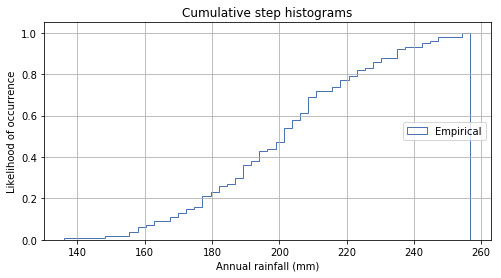

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

np.random.seed(0)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label='Empirical')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

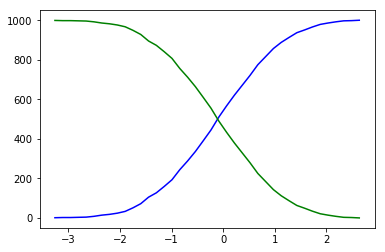

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# some fake data
data = np.random.randn(1000)
# evaluate the histogram
values, base = np.histogram(data, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
#plot the survival function
plt.plot(base[:-1], len(data)-cumulative, c='green')

plt.show()

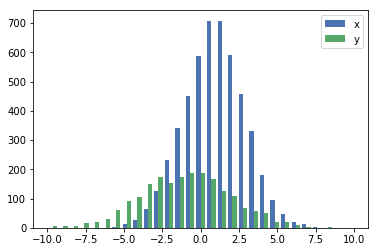

In [84]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 2000)
bins = np.linspace(-10, 10, 30)

plt.hist([x, y], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
SALT2_HubbleData['f5']

In [73]:
x = np.random.randn(10, 3)
x

In [75]:
SALT2_HubbleData['f5']

array([-0.192405, -0.056047, -0.133173, -0.047625, -0.035289, -0.071068,
       -0.084431,  0.056185,  0.013845, -0.059712, -0.264996, -0.436535,
       -0.339081, -0.209945,  0.308704, -0.054189,  0.333731,  0.098613,
        0.055281,  0.085584, -0.467379,  0.256004, -0.027039,  0.015245,
        0.041295,  0.245225, -0.152427,  0.018821,  0.030442,  0.149729,
        0.001852, -0.036204, -0.026917,  0.050159,  0.120191,  0.190286,
        0.180301,  0.200292, -0.136192, -0.019472,  0.449286,  0.160132,
        0.014559, -0.135624, -0.135018, -0.082841,  0.020074,  0.531848,
       -0.172151, -0.306319,  0.13503 , -0.157043, -0.324181,  0.13938 ,
        0.152034,  0.062411])

In [76]:
AnyYJHK_GP_HD_data

array([ -5.37129271e-02,   2.67013160e-03,  -6.39605727e-02,
         1.44860042e-01,   8.97057656e-02,   8.91712173e-02,
        -2.48567923e-01,   1.62812701e-02,   3.51712162e-01,
        -3.41869167e-02,   1.31458447e-02,  -8.68387267e-02,
         4.64320990e-03,  -2.47262200e-04,   1.37572340e-03,
        -1.02539336e-01,  -1.12438268e-01,   5.72451282e-02,
        -5.99374263e-02,   6.78340373e-02,   2.02955378e-01,
        -7.75272330e-02,  -7.75050475e-02,   1.26093066e-01,
         1.26966026e-01,  -3.31035214e-02,   2.71207437e-02,
         2.53889271e-02,   9.34232021e-02,  -1.65450889e-01,
        -5.42495946e-02,  -2.54440887e-01,   4.07073899e-02,
         7.17730197e-02,   2.49799457e-01,  -1.35570058e-01,
        -1.49102655e-01,  -3.59659990e-03,  -4.05714966e-02,
        -1.10189817e-01,   1.98720215e-01,  -3.99998513e-02,
        -1.15669534e-01,  -1.47319073e-02,  -2.35939691e-02,
        -1.12067405e-01,  -2.71939973e-01,  -1.62441939e-01,
         8.33442402e-02,

In [83]:
np.column_stack((SALT2_HubbleData['f5'], AnyYJHK_GP_HD_data))

array([[ -1.92405000e-01,  -5.37129271e-02],
       [ -5.60470000e-02,   2.67013160e-03],
       [ -1.33173000e-01,  -6.39605727e-02],
       [ -4.76250000e-02,   1.44860042e-01],
       [ -3.52890000e-02,   8.97057656e-02],
       [ -7.10680000e-02,   8.91712173e-02],
       [ -8.44310000e-02,  -2.48567923e-01],
       [  5.61850000e-02,   1.62812701e-02],
       [  1.38450000e-02,   3.51712162e-01],
       [ -5.97120000e-02,  -3.41869167e-02],
       [ -2.64996000e-01,   1.31458447e-02],
       [ -4.36535000e-01,  -8.68387267e-02],
       [ -3.39081000e-01,   4.64320990e-03],
       [ -2.09945000e-01,  -2.47262200e-04],
       [  3.08704000e-01,   1.37572340e-03],
       [ -5.41890000e-02,  -1.02539336e-01],
       [  3.33731000e-01,  -1.12438268e-01],
       [  9.86130000e-02,   5.72451282e-02],
       [  5.52810000e-02,  -5.99374263e-02],
       [  8.55840000e-02,   6.78340373e-02],
       [ -4.67379000e-01,   2.02955378e-01],
       [  2.56004000e-01,  -7.75272330e-02],
       [ -

In [80]:
test1 = np.hstack([SALT2_HubbleData['f5'], AnyYJHK_GP_HD_data])

In [81]:
test1

array([ -1.92405000e-01,  -5.60470000e-02,  -1.33173000e-01,
        -4.76250000e-02,  -3.52890000e-02,  -7.10680000e-02,
        -8.44310000e-02,   5.61850000e-02,   1.38450000e-02,
        -5.97120000e-02,  -2.64996000e-01,  -4.36535000e-01,
        -3.39081000e-01,  -2.09945000e-01,   3.08704000e-01,
        -5.41890000e-02,   3.33731000e-01,   9.86130000e-02,
         5.52810000e-02,   8.55840000e-02,  -4.67379000e-01,
         2.56004000e-01,  -2.70390000e-02,   1.52450000e-02,
         4.12950000e-02,   2.45225000e-01,  -1.52427000e-01,
         1.88210000e-02,   3.04420000e-02,   1.49729000e-01,
         1.85200000e-03,  -3.62040000e-02,  -2.69170000e-02,
         5.01590000e-02,   1.20191000e-01,   1.90286000e-01,
         1.80301000e-01,   2.00292000e-01,  -1.36192000e-01,
        -1.94720000e-02,   4.49286000e-01,   1.60132000e-01,
         1.45590000e-02,  -1.35624000e-01,  -1.35018000e-01,
        -8.28410000e-02,   2.00740000e-02,   5.31848000e-01,
        -1.72151000e-01,